# Introduction

## The Silhouettes Dataset

It's not yet possible to "try before you buy" online so most major clothing retailers include images of models in their items on their ecommerce sites to give shoppers an idea of what to expect. However, popular online second-hand markets (ie. Poshmark, Depop, EBay, Grailed, Vinted... etc.) are comprised of individuals reselling their used garments or rare specially sourced vintage or high fashion items. These individual sellers are not always able to model their listings and are not obligated to find models that can. As a result, it can be challenging for fashion-savvy consumers browsing these online markets to identify items in the styles and silhouettes that they seek. 

This dataset was designed to study 3 popular silhouettes of women's garment tops: triangle/trapeze, hourglass, and tubular-- particularly when the garment is *not* being worn on a body. The silhouette is the shape that a garment takes when worn on the body. Silhouettes are essential to personal style as different silhouettes accentuate the body in different ways. Silhouettes are created by the cut of the garment, the material used to construct the garment, and by the physique of the individual wearing the garment. Since clothing models are not always feasible for small sellers, prospective buyers would benefit from understanding the unique features of different silhouettes when they are not being worn.  

The dataset consists of 1305 35x35 images of clothing items belonging to 3 classes: 'babydoll_trapeze', 'bustier_hourglass', and 'tshirt_straight', each corresponding to a common silhouette. The 'babydoll_trapeze' class represents the triangle/trapeze silhouette. Garments that feature the triangle/trapeze silhouette have a high waist, set just under the bust and a flowing, loose bodice that flares outwards, creating a trapezoidal shape. The silhouette is created by the shape of the bodice, so the type of neckline, sleeve length, and overall length of a garment does not matter. The 'bustier_hourglass' class represents the hourglass silhouette which features a bodice with with exagerated waist indentions that accentuate the bust and the hips. If the length of the bodice extends down to the hips (ie. full length instead of cropped) then the shoulder and hip width should be nearly equal, thus creating an hourglass shape. When not worn on the body, this silhouette is ideally represented by bustier or corset tops. Since corsets and bustiers usually feature 'boning' or are made of stiff materials to cinch the waistline in an aggressive manner, they still retain an hourglass shape when not worn. The 'tshirt_straight' class represents the rectangular or tubular silhouette. As can be inferred from the name, the bodice of a tubular or rectangular garment falls in a straight line, perpendicular to the top of the shoulder and the bottom hem. This silhouette can be represented by any loose-cut t-shirt or shirt. 

 Each class contains 435 hand-selected images from the image gallery, Pinterest and bulk downloaded with *gallery-dl*. Each selection represents an unique garment from the target class either lying flat or on a hanger. The majority of the selected images were not professionally taken and were posted on Pinterest by resellers/sellers to represent their item listings on resale markets. Selecting these types of images preserves some of the variance in angles, exposures, and photo perspectives that an actual consumer would encounter when browsing listings from different sellers. The downloaded images were additionally preprocessed with *rembg* to remove noise contributed by backgrounds and *tensorflow* to remove color channels from the images, create class labels from subdirectory folder names, as well as uniformly resize all images to 35x35 pixels. The decision to remove backgrounds from the images stemmed from the reality that many of the images were not professionally taken. Images of garments were taken on top of brightly patterned bedding, grass, carpets, etc. that could create unwanted distractions from the focal point of the image. At the same time, removing backgrounds does not change the variations in lighting, angles, and photo perspectives of the actual items in the images. The images were transformed to grayscale because a garment's color or pattern does not define it's silhouette. The figure below shows a side by side comparison of an image from the hourglass silhouette class before and after background removal.

## Dimensionality Reduction Methods

Dimensionality reduction methods assign instances to real-value vectors in a lower dimensional spaces while preserving the relationships between the instances. The objective of applying these transformations is to reduce noise in datasets. The three dimensionality reduction methods tested on this dataset are: Principal Component Analysis (PCA), Kernel Principal Component Analysis (KPCA), and Isometric Mapping (Isomap).

### PCA Overview

PCA is a linear method for an orthogonal basis transformation. For a dataset, $x_k, k=1,...l, x_k \in R^N$, PCA is a basis transformation to diagonalize the estimated covariance matrix of the data defined as $COV = \frac{1}{l} \sum_{j=1}^{l} x_jx_j^T$. The *principal componenents* are the orthogonal projections onto the eigenvectors-- a linear combination of the original variables and the elements of the eigenvectors of the covariance matrix. For this project, the library sci-kit learn is used to apply PCA by computing the singular value decomposition (SVD) of the dataset, defined as $X = USV^T$. The principal axes are contained in the columns of $V$ and the columns of $U$ contain the scaled principal components. $S$ is a diagonal matrix of the singular values. The principal axes correspond with the eigenvectors of the covariance matrix whose eigenvalues are $\lambda = \frac{S^2}{l}$. 

### Kernal PCA Overview

The objective of Kernel PCA is to understand non-linear relationships in a dataset. KPCA overcomes the linear limitations of PCA by using a *kernel trick* that maps data into a higher-dimensional feature space before commencing PCA. Given dataset $x_n, n=1,...l, x_n \in R^N$, KPCA has two parts: transforming the data nonlinearly into the feature space $F$ by $\phi : R^N \rightarrow F, x \mapsto X$ then solves the linear PCA for the feature vectors (solve for the directions in $\phi$ that maximizes the variance of $\phi(x)$). 

The algorithm to compute Kernel PCs:

1) Select a kernel function $k(x,y)$ 
    - The inner product of two feature vectors is $\langle \phi(x_i),\phi(x_j) \rangle_F = k(x_i, x_j)$. This is the *kernel trick* where the kernel can evaluate the inner product of any two feature vectors efficiently without knowing $\phi(.)$ or $F$.
    - Gaussian Radial Basis Function (RBF): $k(x,y) = exp(\frac{-||x-y||^2}{2\theta^2})$
    - Polynomial: $k(x,y) = (x * y)^d$
    - Sigmoid: $k(x,y) = \tanh(k(x * y) + \Theta)$

2) Compute a Gram (Kernel) matrix $K_{ij} = k(\phi(x_i), \phi(x_j))$
    - The non-linear feature map is determined by a postive definite kernel-- which is a symmetric kernel $k(.,.)$ defined on a space $F$ where the Gram matrix $(k(x_i,x_j))_{ij}$ is postive semi-definite for an arbitrary number of points $x_1,.., x_n \in x$.
    - The Gram matrix $G = US^2U^T$ has eigenvectors $U$ and eigenvalues $S^2$

3) Center the Kernel matrix
    - $K_{centered} = K - 1_nK - K1_n + 1_nK1_n$ where $1_n$ is a $n x n$ matrix with elements equal to $\frac{1}{n}$

4) Find $U$ and $S^2$ of $K_{centered}$ and multiply each eigenvector by the square root of the corresponding eigenvalue 

### Isometric Mapping Overview

t-SNE is a non-linear method that transforms high dimensional data points to joint probabilities and uses these probabilities to minimize the Kullback-Leibler divergence to obtain low dimensional embeddings. The Kullback-Leibler divergence is the statistical distance where it represents the calculation of how one probability distribution is different from the other one

The t-SNE algorithm:

1)  Calculate the joint probabilities between the data points that represent the similarity between points

2)  Assigns the similarity between the data points on the basis of the calculated joint probability

3)  Represent the data points on lower dimensions on the basis of probability distribution until the minimum Kullback-Leibler divergence 

## Classification Methods 

The classification algorithms selected for this project are: K-Nearest Neighbors (KNN) and  Support Vector Machines (SVM). While Convolutional Neural Networks (CNNs) are highly effective at learning spatial and temporal relationships between pixels in images and would have been excellent for classifying garment silhouettes, the dataset is too small to be used to train neural networks at this time. Each selected classification method will be fit and evaluated for classification performance on the raw data (d=1225) which retains all 1225 image features, the data transformed by PCA, the data trannsformed by KPCA, and the data transformed by Isometric Mapping. 

Two classification methods have been selected in order to additionally compare the performances of different algorithms on different data representation methods. The Sci-kit library will be used for all classification tasks in this project.

### K-Nearest Neighbors Overview

The K-Nearest Neighbors (KNN) algorithm is a non-parametric, lazy, supervised learning algorithm that uses the computed distance between instances to assign instances to classes based on their proximity. KNN is non-parametric because it does not make assumptions about the underlying distribution of the data. This algorithm is considered 'lazy' because it relies on memorizing the training set rather than learning a discriminative function. The classification mechanism of this algorithm relies on the assumption that similar input instances have similar outputs. The KNN algorithm requires some designated number of neighbors $K$ to define the neighborhood around an instance. A distance metric (ie. Euclidean, Manhattan, etc.) will be used to calculate the proximity of the $K$ nearest neighbors of the instance being classified. The instance will then be assigned a class based on a majority vote of nearest neighborhors. 

Example Distance Metrics:
- Euclidean: $d(x ,\tilde{x}) = \sqrt{\sum_{j=1}^{l} (x_j - \tilde{x_j})^2}$
    - Based on the Pythagorean theorem, for each dimension $l$ subtract one instance $x_j$ from the other to get the length of the hypotneuse of the triangle between them and square it. The square root of the summation of squared lengths is the Euclidean distance. 
- Manhattan: $d(x, \tilde{x}) = \sum_{j=1}^{l}| x_j - \tilde{x_j} |$
    - The Manhattan distance in an $l$-dimensional space is the cumulative sum of the absolute value distance between $x_j$ and neighboring points at each step. 

A major drawback of the KNN classifier is the curse of dimensionality. In high-dimensional spaces, training points randomly drawn from the dataset may not be close together in space anymore. As a result, the number of training samples needed grows exponentially with dimensionality. Fortunately, this can be generally overcome by the dimensionality reduction methods described above.

### Support Vector Machines Overview 

Support Vector Machines (SVM) is an eager, supervised learning algorithm that aims to find some hyperplane in an $l$-dimensional space that can separate the data points into respective classes. Unlike 'lazy' learners, 'eager' learners apply some discriminative function learned from the training data to classify the test data. To separate classes of instances, the objective of SVM is to find a hyperplane that maximizes the margin/distance between two classes. Hyperplanes can be likened to a city street, where the street should be as wide as possible without encroaching on the sidewalk where people stand. Support vectors are the points that are close to the hyperplane or fall into the 'gutter' of the boundary and direct the position and orientation of the hyperplane. The decision boundary can be linear or non-linear. For this project, non-linear SVM is used.  

The equation that defines the linear hyperplane is $w^Tx + b = 0$ where $w$ is a weight vector, $x$ is an input vector and $b$ is bias. The distance between the sides of the boundary is equal to $\frac{2}{||w||}$, so $||w||$ must be minimized to maximize the margin of the plane. The primal form of the optimization problem can be written in Lagrangian form as: $minL_p = \frac{1}{2}||w||^2 - \sum_{i=1}^{n} a_iy_i(x_iw_i + b) + \sum_{i=1}^{n} a_i$ s.t. $a_i \geq 0$ where $n$ is the number of training points. $w = \sum_{i=1}^{n} a_iy_ix_i$ can be substituted into the primal form for $w$ and $\sum_{i=1}^{n} a_iy_i = 0$ can be subsituted for $b$ to achieve the dual problem $maxL_D(a_i) = \sum_{i=1}^{n} a_i - \frac{1}{2}\sum_{i=1}^{n} a_ia_jy_iy_j(x_i, x_j)$ s.t. $\sum_{i=1}^{n} a_iy_i = 0, a_i \geq 0$. By taking the derivative wrt to $a$ and setting it to 0, we can solve for $a_i$ and find the weights for the maximal margin. 

The dual problem for the linear hyperplane contains the dot products of $x_i$ and $x_j$. This indicates that it is possible to utilize a *kernel trick* to gain linearly separation by mapping the data to a higher dimensional space. The *kernel trick* changes the optimization problem to $L = \sum a_i - \frac{1}{2}\sum a_ia_jy_iy_j K(x_i, x_j)$ where $K(x_i, x_j)$ is the kernel of choice.

# Raw Data Classification

The raw data consists of 1305 35x35 images that is flattened into a (1305, 1225) array. Each image has 1225 dimensions so the Silhouettes dataset can be considered highly dimensional. The high-dimensionality of the dataset  with respect to the relatively lightweight size of samples (1305) can potentially hinder classification tasks for both the KNN and SVM classifier. However, we can observe from the first image of each class that each class is visually distinct from the other.

## Optimizing Classification Models

In order to identify the optimal hyper-parameters for the KNN and SVM classifiers, we use GridSearchCV to test the performance of potential combinations of hyper-parameters on a sample of the dataset with cross validation. Due to the small size of the dataset, the dataset was split in a stratified manner to preserve class sizes into a training set of 1109 images and a testing set of 196 images. The hyper-parameter combinations were then tested on the training set of raw data images.

The most important hyper-parameter for the KNN classifier is the $K$ number of neighbors to consider. For each $K = 1,...,49$, GridSearchCV initiates and fits a new KNN model with euclidean distance parameters and given $K$ on the training set accross 5 cross validated iterations, totalling 245 iterations. Using this method, we identified the optimal hyper-paramter is $K = 3$ neighbors for our dataset with an average global accuracy score of 83.68% from 5 cross-validation rounds. The effects of hyper-parameter testing for KNN is relatively simple and easily visualized.

Comparatively, SVM has far more hyper-parameters to tune than KNN. In order to achieve an optimal model, hyper-parameters for $C$ the regularization parameter or penalty parameter, $gamma$ defines how far the influence of a single training example reaches, and the $kernel$ to use to non-linearly map the data for classification. The parameters tested for $C$:[0.1,1,10,100], $gamma$:[0.0001,0.001,0.1,1], and $kernel$: ['rbf', 'poly']. For larger values of $C$ the optimization will opt for a narrow-margin hyperplane, increasing the penalty for misclassification while smaller values do the opposite. If $gamma$ is too large, the radius of the area of influence of the support vectors only includes the support vectors, but if gamma is too small the model will fail to capture the complexity of the data. The ideal kernel depends on the underlying dataset itself so the best way to choose is through testing different ones. Using GridSearchCV and the designated training set, the SVM model was initiated with 5 cross validated folds for the 32 possible hyper-parameter combinations, totalling 160 fits. The optimal hyper-parameters obtained from this test were: {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}. The optimal mean score was 89.18% for 5 folds. The top results from hyper-parameter testing for SVM have been compiled into a table because the drastic variations in scores from different combinations of hyper-parameters would make a graph extremely difficult to read.

## Classifying "Raw" Data

Having replicated the optimal hyper-parameters for the KNN model and for the SVM model, we can now define the KNN and SVM models we are using with the new hyper-parameters. Both the KNN and SVM models are fit on the training dataset of raw data images that was also previously used to identify the optimal hyper-parameters. The training instance contains 1109 images sampled randomly from the dataset. Both of the models are then evaluated on their respective performances in determining the class labels of the test set of 196 images. 

The overal accuracy score for the KNN model was 84% compared to 92% from the SVM. 

We can observe from the confusion matrices that the KNN model and SVM differ in their classification performances across the different classes. While both models struggled to classify the 'bustier/hourglass' class, the KNN model fared a bit worse-- with 25 false negatives and 5 false positives compared to 9 and 2 from the SVM. This is can be hypothetically attributed to the previously mentioned fact that the 'bustier/hourglass' silhouette does not usually take on a strong hourglass shape until it is on the body. Though we have attempted to overcome this by selecting types of clothing made of stiff materials that hold their shape to represent the class, there are likely still instances of 'bustier/hourglass' images that resemble the silhouettes of the 't-shirt/straight' or 'babydoll/trapeze' classes. 

# PCA Data Representation

By applying PCA to the Silhouettes dataset, we hope to reduce some of the noise and complexity that may be leading to misclassification instances. Applying PCA ideally reduces the overall dimensionality while still preserving most of the variance that exists in the data. The question to answer is: What is the fewest number of dimensions that can explain the majority of the variance?

We can observe from the scree plot that just a handful of PC components is able to explain nearly 70% of the datasets variance. This also suggests that the relationships in the data can be linearly explained and that PCA is a good method for reducing the dimensionality of this dataset. 

In order to test for the optimal number of principal components (features/dimensions) to retain in the dataset for classification, we tested potential number of components as the percentage of variance we want the dataset to retain after PCA: [0.7,0.72,0.74,0.76,0.78,0.8,0.82,0.84,0.86,0.88,0.9,0.92,0.94,0.96]. Sci-kit's PCA function is particularly helpful as it takes float values of explained variance as the argument for the number of principal components. For each value of explained variance, the *unsplit* images dataset is fit and reduced to obtain the corresponding coefficients and scores. Since PCA is a linear method, it is reasonable to reconstruct the original images in the new PCA basis (dot product of score and coefficients) to use for classification. For each PCA instance, the new basis images are split into the same sample training set and testing set as the raw data method (by preserving the random state we can replicate the split over and over). The optimal KNN and SVM models are then trained on the transformed training set and evaluated on the transformed testing set for each PCA instance. The scores from each iteration for each model have been recorded and displayed below. 

### Classifying the New PCA Basis

We have observed from the graph that for both the KNN and the SVM model, the ideal amount of variance to preserve in the dataset to maximize classification performance is around 74-76%. While the SVM model performs best at 74% while the KNN model performs best at 76%, the difference in accuracy between the two instances is extremely minute. 

Ultimately, 76% of variance was selected to be retained in the dataset because it emphasizes the massive performance boost in the KNN classifier. Just 27 principal components are needed to retain 76% of the variance in the Silhouettes dataset. This is a massive reduction from the 1225 dimensions of the original dataset. We can observe the first image from each class of the data transformed into a new PCA basis. The images are able to retain their general original form with only 27 principal components. 

This reduction in dimensionality successfully boosted the KNN classifier's performance from 84% to 90%. On the other hand, the SVM's performance did not improve at all. Rather, with 27 principal components and 76% variance retained, the SVM's performance slightly deteriorated from 92% to 91%. It should be noted that if we retained 94% of the variance instead, then the SVM's performance would not be affected at all. This lack of change suggests that the SVM is far less sensitive to outliers and noise in the data than the KNN classifier. 

Between the raw data and the new PCA basis, the misclassification rates for the SVM remained fairly static, which suggests that while linear dimensionality reduction does not necessarily hurt nor help SVM in this specific case. On the other hand, the misclassification rates for the KNN have appeared to improve after the dataset was projected into a new PCA basis. NOT DONE

# Kernel PCA Data Representation 

We know that Kernel PCA, the non-linear form of PCA dimensionality reduction has significantly more hyper-parameters to tune in relation to the dataset to transform. Kernel PCA also does not have the attribute of "explained variance" like PCA, eliminating the possibility of using some visuals like a Scree Plot to evaluate the signficance of principal components. Kernel PCA is also different from PCA in the sense that we should not project the transformed data into it's original dimensions to form a new basis for classification. Kernel PCA projects the data into even higher dimensions to determine non-linear relationships in the data. As a result, when the data points are projected back down to their original dimensions, the dataset cannot be reconstructed without error. Therefore, it is more reasonable to utilize transformed the projection of data on the principal components. 

In order to optimally transform the Silhouette dataset for classification, we must evaluate different combinations of hyper-parameters against each of the classification models using GridSearchCV. Like SVM, Kernel PCA also uses kernels to project data into higher dimensions so we must test different $kernels$, values of $gamma$, $degree$ (for polynomial and sigmoid kernel) in addition to adjusting the number of principal components. This is a very computationally expensive process as the set of potential hyper-parameters will be tested for each classification model and cross-validated. Based on the effects of linear PCA on the performances of the KNN model and SVM model, we can hypothesize that Kernel PCA will also affect the two models differently. 

In the interest of reducing runtime, the GridSearch for hyper-parameters is split into multiple batches. The first batch evaluates the performance of n_components: [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600], gamma: np.linspace(0.001, 0.05, 10), and kernel: ["rbf"] on data that is then used to train the optimal KNN model. "np.linspace(0.001, 0.05, 10)" means that the GridSearch will test gamma values from 0.001, increasing by increments of 0.05 until 10. The next batch evaluates the performance of n_components: [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600], gamma: np.linspace(0.001, 0.05, 10), coef0: np.linspace(0.001, 0.05, 10), degree: [1, 2, 3, 4, 5] and kernel: ["poly", "sigmoid"] on data that is then used to train the optimal KNN model. Both batches of potential combinations are cross-validated with 3 folds and the top 5 combinations of hyper-parameters from each batch are displayed below. 

We can see that the overall best hyper-parameters for Kernel PCA to prepare data for the KNN model is where the coef0: 0.028, degree: 2, gamma: 0.0064, kernel: sigmoid, and n_components: 40. This combination achieved the highest average score of 87% compared to all other combinations of hyper-parameters. 

The next two GridSearch batches are used to evaluate the optimal Kernel PCA hyper-parameters in relation to the SVM classifier. Unfortunately, the combination of the two kernel methods only further increases the computational complexity and runtime of testing different Kernel PCA hyper-parameters. 

The first attempt of evaluating Kernel PCA with n_components: [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600], gamma: np.linspace(0.001, 0.05, 10), coef0: np.linspace(0.001, 0.05, 10), degree: [2, 3, 4, 5] and kernel: ["rbf", "sigmoid", "poly"] to prepare data for the SVM classifier with 3 cross validated folds for each combination ran for over 780 minutes (13 hours) without conclusion. This batch ran overnight and ultimately had to be killed. Separating the batch into 3 mini batches by kernel also did not help signficantly as the GridSearch evaluation for just the "poly" kernel ran for over 400 minutes (6+ hours) and ultimately could not be allowed to continue for the sake of time and efficiency. The only way to remedy this issue was to cut down on the number of hyper-parameters being tested. 

The first conclusive batch evaluation for Kernel PCA for the SVM classifier was n_components: [50, 100, 500], gamma: [0.005, 0.01, 0.1, 0.5, 1, 5], degree: [2, 3, 4], kernel: ["poly", "sigmoid"]. For the sake of the runtime, we allowed the coef0 (same as SVM param 'C') to take the default value of 1. This batch ran for nearly an hour before concluding, highlighting how the runtime for the GridSearch increases exponentially with increased hyper-parameters. The second batch repeated the same hyper-parameter for n_components, excluding gamma and degree with the rbf kernel. This computation was the fastest by far and concluded in 29 seconds. The top 5 hyper-parameter combinations from both of these batch evaluations are displayed below. 

From the tables, we can observe that the RBF kernel is likely to be incompatible for separating the points in the Silhouette dataset. For both KNN and SVM, the RBF kernel transformation represented the data poorly in comparison to the Sigmoid and Polynomial kernels. From the tables we can observe that the ideal kernel for representing the data for SVM classification is the polynomial kernel with degree: 4, n_components: 100, gamma: 0.01, yielding an average score of 88%. Since we now know the optimal hyper-parameters, we can replicate the data transformations to achieve the new optimal outcomes in the KNN and SVM classifiers. 

The replication is achieved by initating a new Kernel PCA instance with the optimal hyper-parameters for each classifier. Unlike in PCA, the dataset will be split into training set (1109 images) and testing set prior to being transformed by Kernel PCA. This is because we will not be using the reconstructed images after PCA. The Kernel PCA object will be fit on, and transform the training set, meaning that it will learn the structure of the training set to apply to the test set. The test set will only be transformed into a new PCA basis. The images will only be mapped back into the original 1225 dimensions after classification for the purposes of visualization. The SVM classifier is trained with training data transformed by Kernel PCA with n_components:100, kernel: 'poly', gamma: 0.01, and degree: 4. The KNN classifier is trained with training data transformed by Kernel PCA with n_components: 40, kernel: sigmoid, gamma: 0.0064, coef0: 0.028, and degree: 2. 

After Kernel PCA (n_components: 100), the SVM classifier's score increased by 2% from 91% to 93%. On the other hand, after Kernel PCA (n_components: 40), the overall score of the KNN classifier remained at 90% and did not change at all. The differences in the optimal kernel representations of the same data for these two classification algorithms highlights how they are affected by the underlying structure of the data and seek to understand the data. The KNN model, a lazy learner that memorizes the training data, simply classifies new data points based on their closest neighboring training points. Even though the data is projected into a higher dimensional space by the Sigmoid kernel, the KNN classifier does not make any improvements overall. This is likely because the KNN classifier computes labels by calculating the euclidean distance between a test point and it's nearest neighbors. Whether the points have all been transformed by a kernel function into a higher-dimensional space do not seem to benefit the classifier in this instance. On the other hand, the SVM classifier seemed to benefit from the Kernel transformation. It is interesting that the ideal kernel for this instance of Kernel PCA is the same as the kernel used by the SVM classifier. Hypothetically, it's possible that maintaining this consistency makes the data points more cleanly separable to the SVM as the Kernel PCA has already projected the data points with the same method that the SVM uses the interpret the points. 

# Isometric Mapping Data Representation 

write something somethings

talk about how it sucks

# Comparing 4 Methods of Data Representation 

insert text

# Conclusion

what weve learened

In [1]:
# import libraries
import numpy as np
from numpy import load
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.image as imgpt
from sklearn.pipeline import Pipeline


Text(0.5, 1.0, 'Background Removed Example')

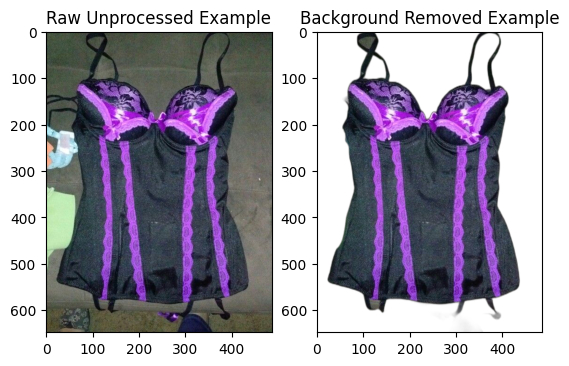

In [2]:
# plot raw RAW unprocessed image
# reading the image
rawImage = imgpt.imread('images/bustier_corset/pinterest_699324648411162597.jpg')
semiImage = imgpt.imread('rmbg_imgs/bustier_hourglass/pinterest_699324648411162597.jpg')

%matplotlib inline 
# displaying the image
plt.subplot(1,2,1)
plt.imshow(rawImage)
plt.title("Raw Unprocessed Example")

plt.subplot(1,2,2)
plt.imshow(semiImage)
plt.title("Background Removed Example")

In [4]:
# load numpy array from npy file
images = load('images.npy')
labels = load('labels.npy')

### Raw Data Code

Text(0.5, 1.0, '(Label: babydoll/trapeze)')
Text(0.5, 1.0, '(Label: bustier/hourglass)')
Text(0.5, 1.0, '(Label: tshirt/straight)')


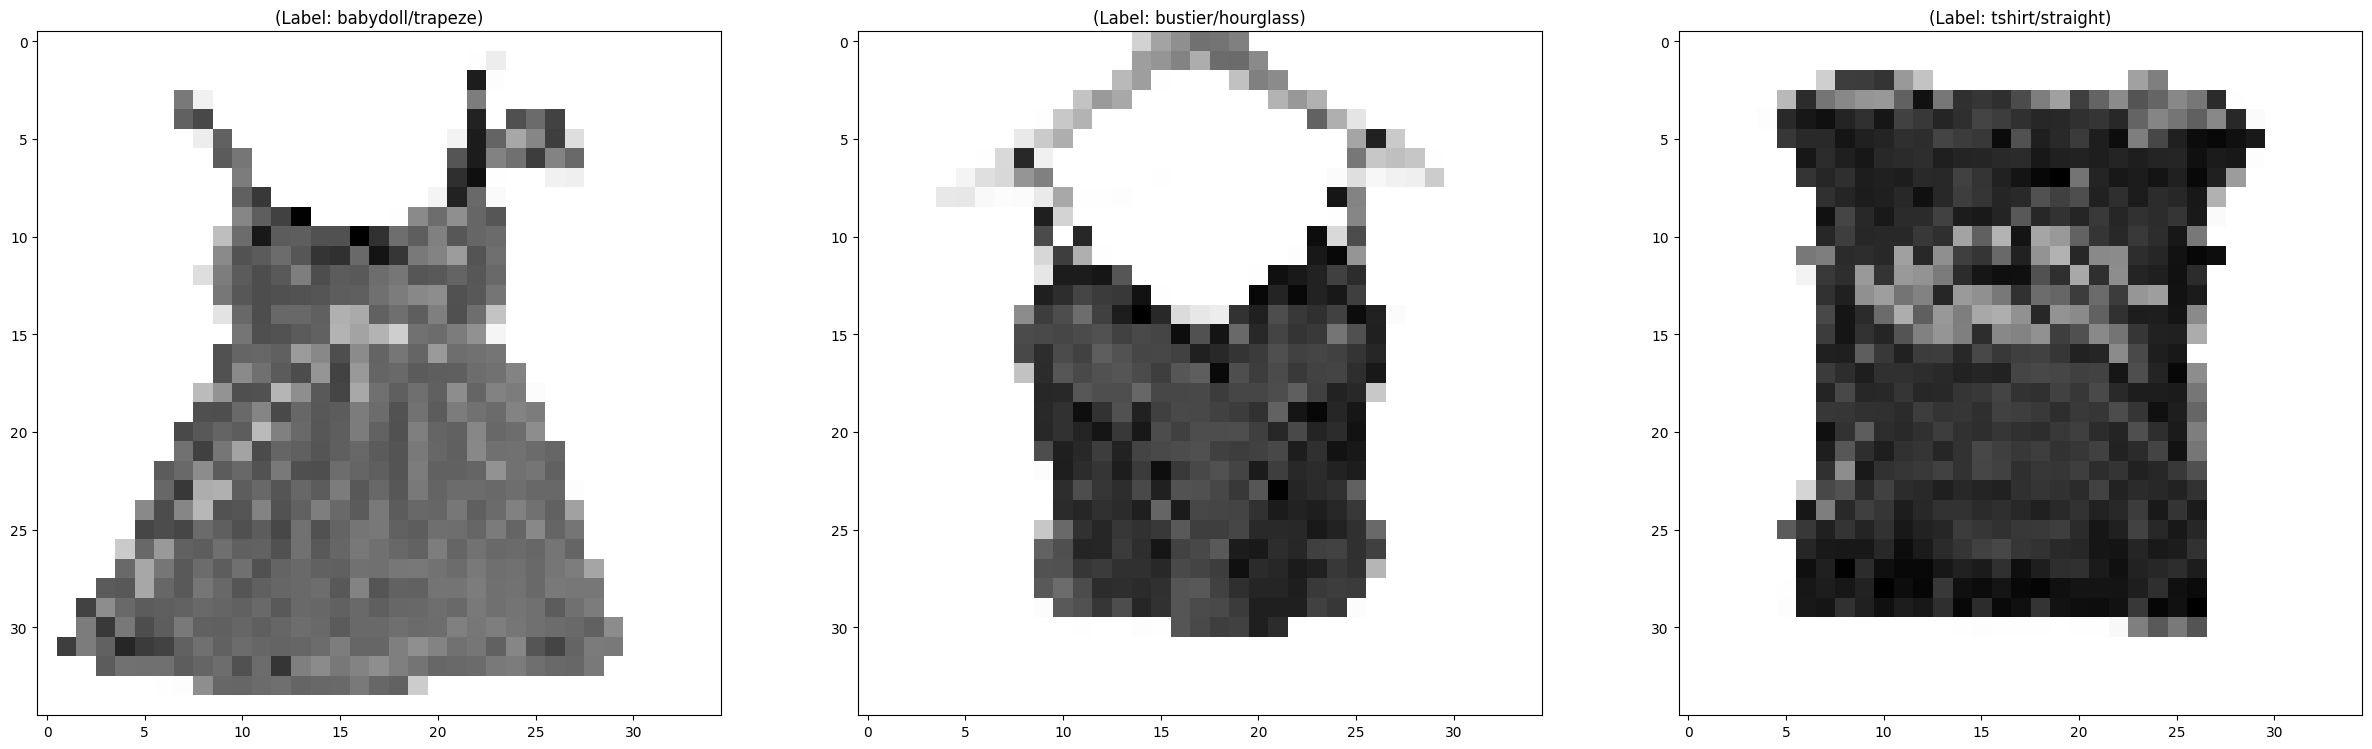

In [5]:
# plot first image of each class

label_list = {
    0: 'babydoll/trapeze',
    1: 'bustier/hourglass',
    2: 'tshirt/straight',
}

 # first image of each class
values = [0, 435, 870]

%matplotlib inline

plt.figure(figsize = [30,15])

for i in range(3):
    plt.subplot(1,3,i+1)
    im = np.reshape(images[values[i]],(35,35))
    plt.imshow(im, cmap='gray_r')
    print(plt.title("(Label: " + str(label_list[labels[values[i]]]) + ")"))

In [6]:
# define functions to call for repetitive tasks to minimize code length

# function to call to get y_pred, accuracy, confusion matrix, classification report for any model
def predict(model, xtrain, ytrain, xtest, ytest):
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)
    if len(ytest)>0:
        #computer the performance matrices for this model
        score = accuracy_score(ytest, y_pred)
        confusion_mat = confusion_matrix(ytest, y_pred)
        class_report = classification_report(ytest, y_pred)
        return y_pred, score, confusion_mat, class_report
    else:
        return y_pred
    
# function to create df from confusion matrix 
def create_confmat_df(x):
    
    "Create a df from given confusion matrix by calculating FP, FN, TP, TN, SPECIFICITY, SENSITIVTY, ACCURACY"

    FP = x.sum(axis=0) - np.diag(x)
    FN = x.sum(axis=1) - np.diag(x)
    TP = np.diag(x)
    TN = x.sum() - (FP + FN + TP)
    # sensitivity, hit rate, recall, TPR
    TPR = TP/(TP+FN)
    # specificity/true negative rate
    TNR = TN/(TN+FP)
    #overall accuracy(by class)
    ACC = (TP+TN)/(TP+FP+FN+TN)
    # create table
    df = pd.DataFrame({'CLASS': np.array([0,1,2]), 'FP': FP, 'FN': FN, 'TP': TP, 'TN': TN, 'SENSITIVITY': TPR, 'SPECIFICITY': TNR, 'ACCURACY': ACC})
    df.set_index('CLASS', inplace=True)
    return df

In [7]:
# choosing train test split to test optimal parameters for classification methods
# train size = 0.85 because dataset is small

xtrain, xtest, ytrain, ytest = train_test_split(images, labels, test_size=0.15, random_state=47, shuffle=True, stratify=labels)

In [13]:
# use gridsearchcv with RAW DATA to determine optimal size K
knn = KNeighborsClassifier()
k_range = list(range(1, 50))
distance = [2]
param_grid = dict(n_neighbors=k_range, p=distance)
  
# defining parameter range
# cv =5 cross validation folds for each k value
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


Accuracy for our training dataset with tuning is : 83.68%
{'n_neighbors': 3, 'p': 2}


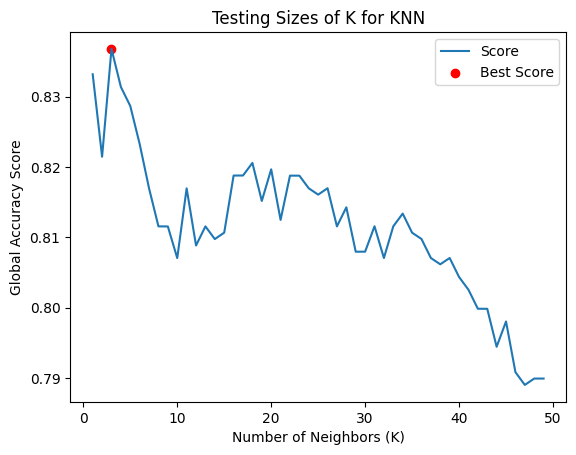

In [14]:
# optimal size k
allgridscores = list(grid_search.cv_results_['mean_test_score'])
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(grid_search.best_score_ *100) )
print(grid_search.best_params_)

plt.plot(k_range, allgridscores, label='Score')
plt.scatter(k_range[2], allgridscores[2], label='Best Score', color='red')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Global Accuracy Score')
plt.title('Testing Sizes of K for KNN')
plt.legend()

In [15]:
# find optimal params for non-linear svm using raw data
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
svm_grid=GridSearchCV(svc,param_grid, scoring='accuracy', verbose=1)

# fitting the model for grid search
svm_gridsearch = svm_grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [16]:
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(svm_gridsearch.best_score_ *100) )
print(svm_gridsearch.best_params_)

Accuracy for our training dataset with tuning is : 89.18%
{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}


In [17]:
results_svm = svm_gridsearch.cv_results_
svmtable = pd.DataFrame(results_svm)
svmtable.drop(['params','split0_test_score','split1_test_score','split2_test_score','split3_test_score','split4_test_score'], axis=1, inplace=True)
svmtable = svmtable.sort_values(by=['rank_test_score']).head(10)
# to add to pdf
print(svmtable.to_latex(index=False,
                  float_format="{:.5f}".format,))

\begin{tabular}{rrrrlllrrr}
\toprule
 mean\_fit\_time &  std\_fit\_time &  mean\_score\_time &  std\_score\_time & param\_C & param\_gamma & param\_kernel &  mean\_test\_score &  std\_test\_score &  rank\_test\_score \\
\midrule
       0.97733 &       0.18966 &          0.03727 &         0.00303 &       1 &           1 &         poly &          0.89178 &         0.00961 &                1 \\
       4.74502 &       1.07780 &          0.17183 &         0.08391 &     100 &     0.10000 &         poly &          0.89178 &         0.00961 &                1 \\
       1.83878 &       0.82175 &          0.06710 &         0.02165 &      10 &           1 &         poly &          0.89178 &         0.00961 &                1 \\
       2.08071 &       0.63645 &          0.06739 &         0.01225 &      10 &     0.10000 &         poly &          0.89178 &         0.00961 &                1 \\
       2.29620 &       0.63265 &          0.09487 &         0.09488 &       1 &     0.10000 &         poly 

/var/folders/j2/8gptfrvd0_dfl_yxfcck_hh40000gn/T/ipykernel_35091/246238813.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(svmtable.to_latex(index=False,


In [39]:
# initiate optimal knn model 
knn = KNeighborsClassifier(n_neighbors=3,algorithm='auto',p=2)
# initiate optimal svm model 
svc=svm.SVC(C=0.1, gamma=1, kernel='poly',probability=True)

# call function
pred_knn, knn_score, knn_confusion, knn_classreport = predict(knn, xtrain, ytrain, xtest, ytest)
pred_svc, svc_score, svc_confusion, svc_classreport = predict(svc, xtrain, ytrain, xtest, ytest)

print("Overall Accuracy: {0:.2f}".format(knn_score))
print("Overall Accuracy: {0:.2f}".format(svc_score))

Overall Accuracy: 0.84
Overall Accuracy: 0.92


In [17]:
# create df from create_confmat_df func

svc_df = create_confmat_df(svc_confusion)
knn_df = create_confmat_df(knn_confusion)

# save to csv to avoid recomputing

svc_df.to_csv("svc_df.csv")
knn_df.to_csv("knn_df.csv")

In [38]:
svc_df = pd.read_csv("svc_df.csv")
knn_df = pd.read_csv("knn_df.csv")

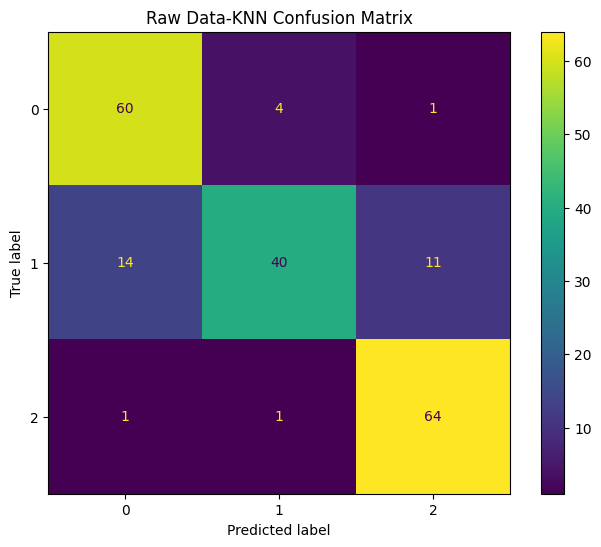

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay

# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(knn_confusion, display_labels=knn.classes_)

# set the plot title using the axes object
ax.set(title='Raw Data-KNN Confusion Matrix')

# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax)

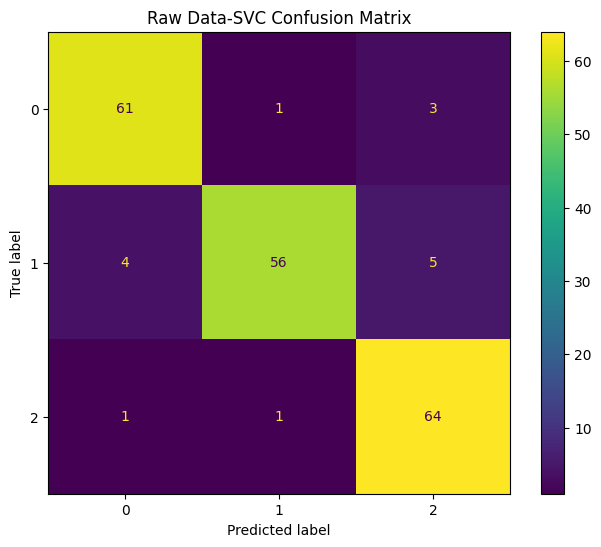

In [41]:
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(svc_confusion, display_labels=knn.classes_)

# set the plot title using the axes object
ax.set(title='Raw Data-SVC Confusion Matrix')

# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax)

In [10]:
svc_df

,CLASS,FP,FN,TP,TN,SENSITIVITY,SPECIFICITY,ACCURACY
0,0,5,4,61,126,0.938462,0.961832,0.954082
1,1,2,9,56,129,0.861538,0.984733,0.943878
2,2,8,2,64,122,0.969697,0.938462,0.948980


In [11]:
knn_df

,CLASS,FP,FN,TP,TN,SENSITIVITY,SPECIFICITY,ACCURACY
0,0,15,5,60,116,0.923077,0.885496,0.897959
1,1,5,25,40,126,0.615385,0.961832,0.846939
2,2,12,2,64,118,0.969697,0.907692,0.928571


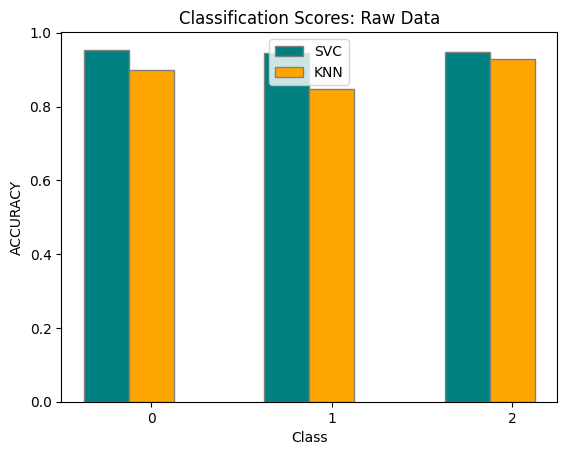

In [52]:
barWidth = 0.25
br1 = np.arange(len(svc_df))
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, svc_df.ACCURACY, color ='teal', width = barWidth,
        edgecolor ='grey', label ='SVC')
plt.bar(br2, knn_df.ACCURACY, color ='orange', width = barWidth,
        edgecolor ='grey', label ='KNN')
 
# Adding Xticks
plt.xlabel('Class')
plt.ylabel('ACCURACY')
plt.title('Classification Scores: Raw Data')
plt.xticks([r + barWidth for r in range(len(svc_df))],
        ['0', '1', '2'])
 
plt.legend()
plt.show()

## PCA representation 

In [42]:
# initiate PCA
pca = PCA(n_components=1225)
# project our data into PC space
pca_images = pca.fit_transform(images)

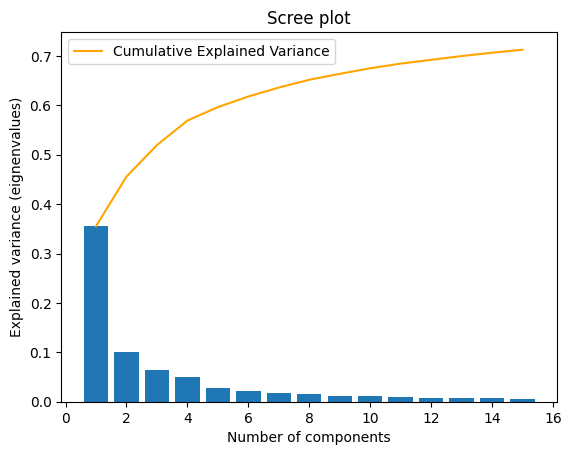

In [43]:
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_ratio_[0:15])+1),
    pca.explained_variance_ratio_[0:15]
    )
 
plt.plot(
    range(1,len(pca.explained_variance_ratio_[0:15])+1),
    np.cumsum(pca.explained_variance_ratio_[0:15]),
    c='orange',
    label='Cumulative Explained Variance')
 
plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot')
 
plt.show()

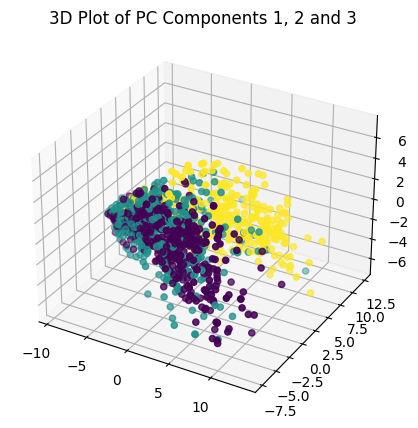

In [44]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(pca_images[:,0], pca_images[:,1],pca_images[:,2], c=labels)
plt.title("3D Plot of PC Components 1, 2 and 3")
plt.show()

In [22]:
# initiate optimal knn model to test the optimal pca dimensions
knn = KNeighborsClassifier(n_neighbors=3,algorithm='auto',p=2)
# initiate optimal svm model to test optimal pca
svc=svm.SVC(C=0.1, gamma=1, kernel='poly',probability=True)

# percentage of explained variance to test
ncomponents = np.array([0.7,0.72,0.74,0.76,0.78,0.8,0.82,0.84,0.86,0.88,0.9,0.92,0.94,0.96])
test_Scores = []
svmtest_Scores = []

for i in ncomponents:
    tryPCA = PCA(n_components= i)
    transformed = tryPCA.fit_transform(images)
    basis = np.dot(transformed, tryPCA.components_)
    xtrain, xtest, ytrain, ytest = train_test_split(basis, labels, test_size=0.15, random_state=47, shuffle=True, stratify=labels)
    knn.fit(xtrain, ytrain)
    svc.fit(xtrain, ytrain)
    ypredknn = knn.predict(xtest)
    knnout = accuracy_score(ytest, ypredknn)
    test_Scores.append(knnout)
    ypredsvc = svc.predict(xtest)
    svcout = accuracy_score(ytest, ypredsvc)
    svmtest_Scores.append(svcout)

In [23]:
print(test_Scores[3])
print(svmtest_Scores[2])
print(svmtest_Scores[3])

0.9030612244897959
0.9183673469387755
0.9132653061224489


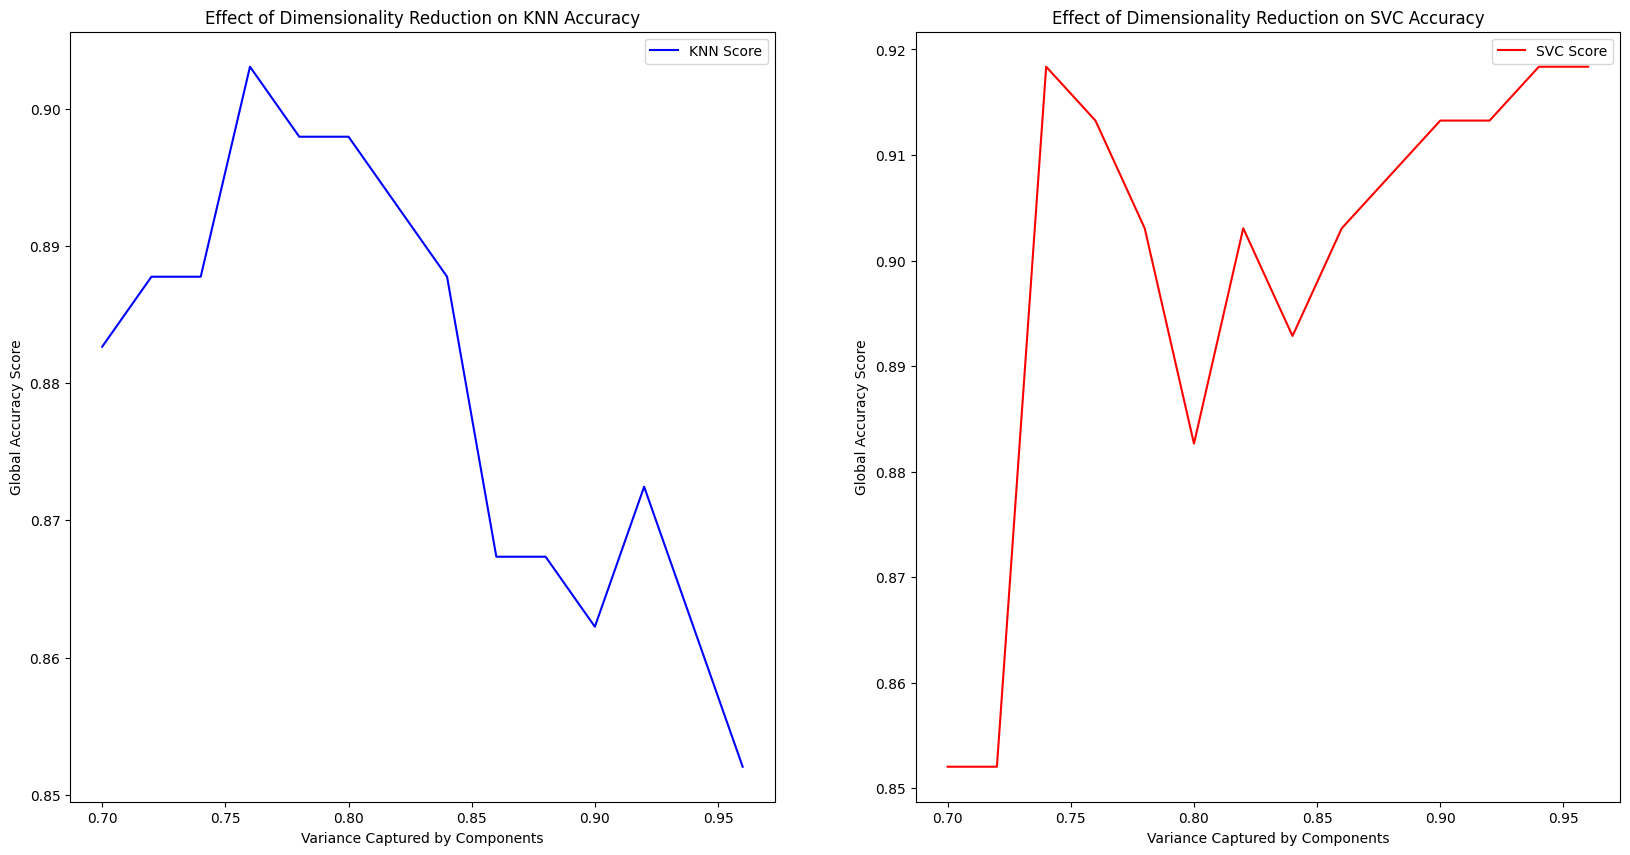

In [24]:
# compare results 

%matplotlib inline

plt.figure(figsize = [20,10])

plt.subplot(1,2,1)
plt.plot(ncomponents, test_Scores, color='b', label='KNN Score')
plt.xlabel('Variance Captured by Components')
plt.ylabel('Global Accuracy Score')
plt.title('Effect of Dimensionality Reduction on KNN Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(ncomponents, svmtest_Scores, color='red',label='SVC Score')
plt.xlabel('Variance Captured by Components')
plt.ylabel('Global Accuracy Score')
plt.title('Effect of Dimensionality Reduction on SVC Accuracy')
plt.legend()
plt.show()

In [45]:
# recreate optimal combinations
# initiate optimal knn model to test the optimal pca dimensions
knn = KNeighborsClassifier(n_neighbors=3,algorithm='auto',p=2)
# initiate optimal svm model to test optimal pca
svc=svm.SVC(C=0.1, gamma=1, kernel='poly',probability=True)

bestPCA = PCA(n_components= 0.76)
transformed = bestPCA.fit_transform(images)
basis = np.dot(transformed, bestPCA.components_)
xtrain, xtest, ytrain, ytest = train_test_split(basis, labels, test_size=0.15, random_state=47, shuffle=True, stratify=labels)

# call function
pred_pcaknn, knn_pca_score, knn_pca_confusion, knn_pcareport = predict(knn, xtrain, ytrain, xtest, ytest)
pred_pcasvc, svc_pca_score, svc_pca_confusion, svc_pcareport = predict(svc, xtrain, ytrain, xtest, ytest)

# scores
print("Overall Accuracy: {0:.2f}".format(knn_pca_score))
print("Overall Accuracy: {0:.2f}".format(svc_pca_score))

Overall Accuracy: 0.90
Overall Accuracy: 0.91


In [101]:
bestPCA.components_

(27, 1225)

In [102]:
transformed.shape

(1305, 27)

In [103]:
basis.shape

(1305, 1225)

27
Text(0.5, 1.0, '(Label: babydoll/trapeze)')
Text(0.5, 1.0, '(Label: bustier/hourglass)')
Text(0.5, 1.0, '(Label: tshirt/straight)')


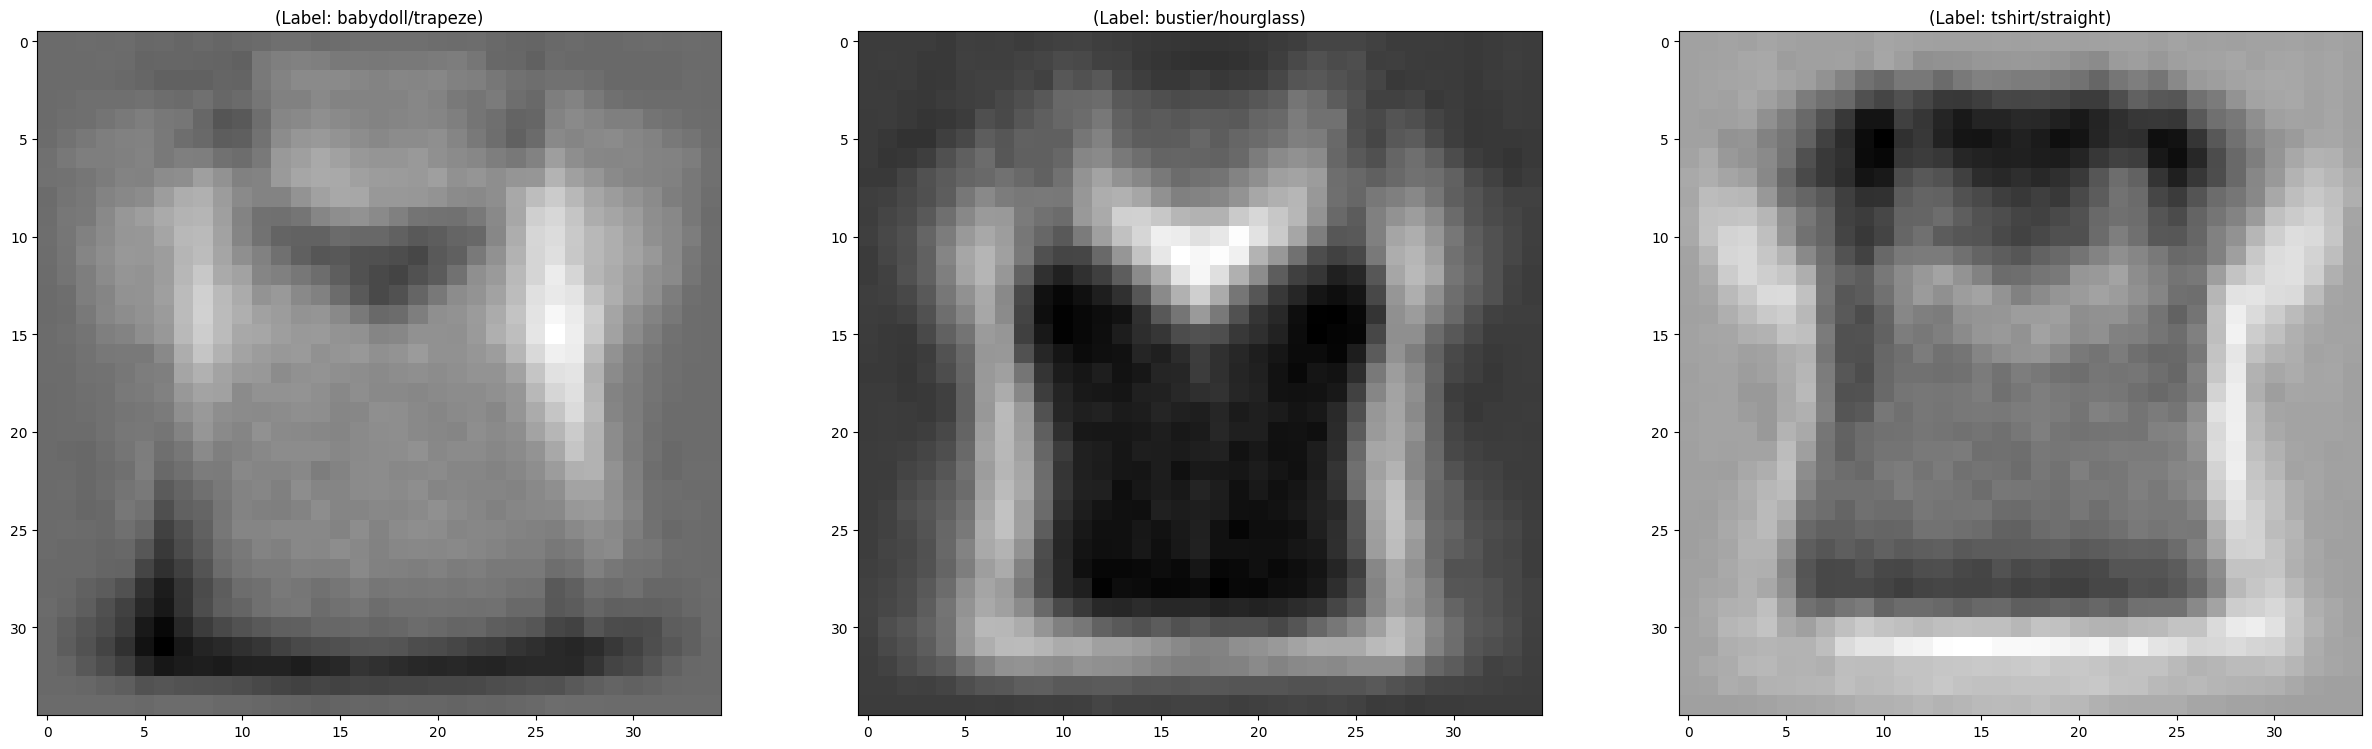

In [32]:
 # first image of each class RECONSTRUCTED AFTER PCA
# number of components kept
print(bestPCA.n_components_)
values = [0, 435, 870]
%matplotlib inline
plt.figure(figsize = [30,15])
for i in range(3):
    plt.subplot(1,3,i+1)
    im = np.reshape(basis[values[i]],(35,35))
    plt.imshow(im, cmap='gray_r')
    print(plt.title("(Label: " + str(label_list[labels[values[i]]]) + ")"))

In [15]:
# use create_confmat_df func to create df
svc_pca_df = create_confmat_df(svc_pca_confusion)
knn_pca_df = create_confmat_df(knn_pca_confusion)

# save to csv to avoid recomputing
svc_pca_df.to_csv("svc_pca_df.csv")
knn_pca_df.to_csv("knn_pca_df.csv")

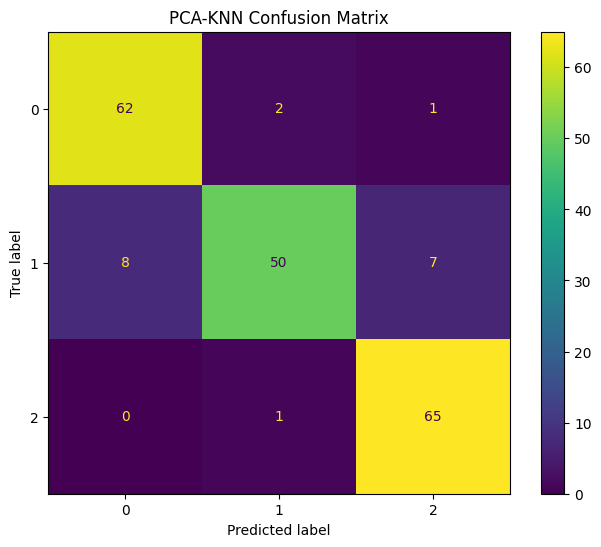

In [47]:

# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(knn_pca_confusion, display_labels=knn.classes_)

# set the plot title using the axes object
ax.set(title='PCA-KNN Confusion Matrix')

# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax)

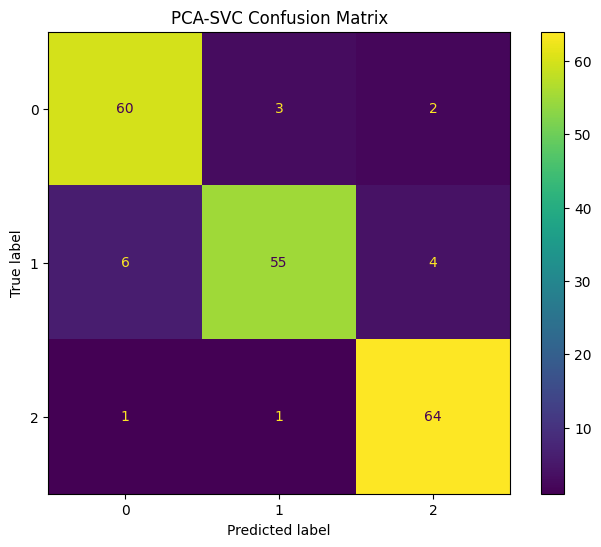

In [46]:
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(svc_pca_confusion, display_labels=svc.classes_)

# set the plot title using the axes object
ax.set(title='PCA-SVC Confusion Matrix')

# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax)

In [12]:
svc_pca_df= pd.read_csv("svc_pca_df.csv")
knn_pca_df = pd.read_csv("knn_pca_df.csv")

In [13]:
svc_pca_df

,CLASS,FP,FN,TP,TN,SENSITIVITY,SPECIFICITY,ACCURACY
0,0,7,5,60,124,0.923077,0.946565,0.938776
1,1,4,10,55,127,0.846154,0.969466,0.928571
2,2,6,2,64,124,0.969697,0.953846,0.959184


In [14]:
knn_pca_df

,CLASS,FP,FN,TP,TN,SENSITIVITY,SPECIFICITY,ACCURACY
0,0,8,3,62,123,0.953846,0.938931,0.943878
1,1,3,15,50,128,0.769231,0.977099,0.908163
2,2,8,1,65,122,0.984848,0.938462,0.954082


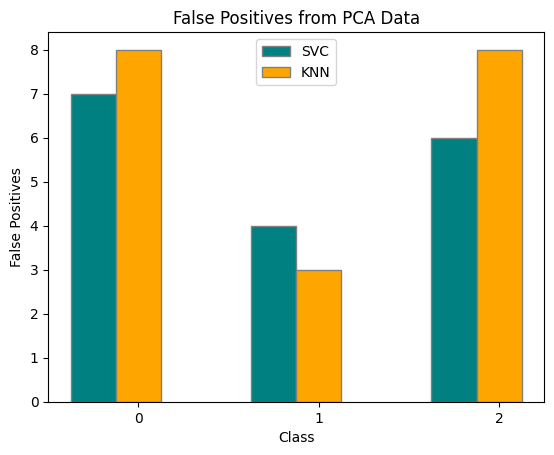

In [23]:
barWidth = 0.25
br1 = np.arange(len(svc_pca_df))
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, svc_pca_df.FP, color ='teal', width = barWidth,
        edgecolor ='grey', label ='SVC')
plt.bar(br2, knn_pca_df.FP, color ='orange', width = barWidth,
        edgecolor ='grey', label ='KNN')
 
# Adding Xticks
plt.xlabel('Class')
plt.ylabel('False Positives')
plt.title('False Positives from PCA Data')
plt.xticks([r + barWidth for r in range(len(svc_df))],
        ['0', '1', '2'])
 
plt.legend()
plt.show()

## Kernel PCA Representation

Limitations of using kernel PCA:


The value of gamma for the ‘rbf’, ‘poly’ and ‘sigmoid’ kernels should be specified by the user as a hyperparameter. It requires implementing a hyperparameter tuning technique such as Random Search or Grid Search.
Unlike in PCA, the n_component hyperparameter does not accept a float value. So, we cannot select the best number of components by specifying the amount of variance that needs to be explained by the principal components.

In [34]:
from sklearn.metrics import mean_squared_error

# find the optimal kpca hyper parameters  
from sklearn.pipeline import Pipeline

clf = Pipeline([
 ("kpca", KernelPCA()),
 ("knn", KNeighborsClassifier(n_neighbors=3,algorithm='auto',p=2))
 ])
param_grid = [{
 "kpca__n_components": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600],
 "kpca__gamma": np.linspace(0.001, 0.05, 10),
 "kpca__kernel": ["rbf"]
 }]
kpcagrid_search = GridSearchCV(clf, param_grid, cv=3)
kpcagrid_search.fit(images, labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA()),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=3))]),
             param_grid=[{'kpca__alpha': array([0.5  , 0.275, 0.05 ]),
                          'kpca__gamma': array([0.001     , 0.00644444, 0.01188889, 0.01733333, 0.02277778,
       0.02822222, 0.03366667, 0.03911111, 0.04455556, 0.05      ]),
                          'kpca__kernel': ['rbf'],
                          'kpca__n_components': [10, 20, 30, 40, 50, 60, 70, 80,
                                                 90, 100, 200, 300, 400, 500,
                                                 600]}])

In [36]:
# find the optimal kpca hyper parameters  
# pipeline for sigmoid and poly kernels

clf = Pipeline([
 ("kpca", KernelPCA()),
 ("knn", KNeighborsClassifier(n_neighbors=3,algorithm='auto',p=2))
 ])
param_grid = [{
 "kpca__n_components": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600],
 "kpca__gamma": np.linspace(0.001, 0.05, 10),
 "kpca__coef0": np.linspace(0.001, 0.05, 10),
 "kpca__degree": [2,3,4,5],
 "kpca__kernel": ["poly", "sigmoid"]
 }]
kpcagrid_search2 = GridSearchCV(clf, param_grid, cv=3)
kpcagrid_search2.fit(images, labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA()),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=3))]),
             param_grid=[{'kpca__coef0': array([0.001     , 0.00644444, 0.01188889, 0.01733333, 0.02277778,
       0.02822222, 0.03366667, 0.03911111, 0.04455556, 0.05      ]),
                          'kpca__degree': [2, 3, 4, 5],
                          'kpca__gamma': array([0.001     , 0.00644444, 0.01188889, 0.01733333, 0.02277778,
       0.02822222, 0.03366667, 0.03911111, 0.04455556, 0.05      ]),
                          'kpca__kernel': ['poly', 'sigmoid'],
                          'kpca__n_components': [10, 20, 30, 40, 50, 60, 70, 80,
                                                 90, 100, 200, 300, 400, 500,
                                                 600]}])

In [37]:
kpcagrid_search2.best_score_

0.8735632183908045

In [38]:
kpcagrid_search2.best_params_

{'kpca__coef0': 0.028222222222222225,
 'kpca__degree': 2,
 'kpca__gamma': 0.0064444444444444445,
 'kpca__kernel': 'sigmoid',
 'kpca__n_components': 40}

Accuracy for our training dataset with tuning is : 86.74%
{'kpca__alpha': 0.5, 'kpca__gamma': 0.01188888888888889, 'kpca__kernel': 'rbf', 'kpca__n_components': 70}


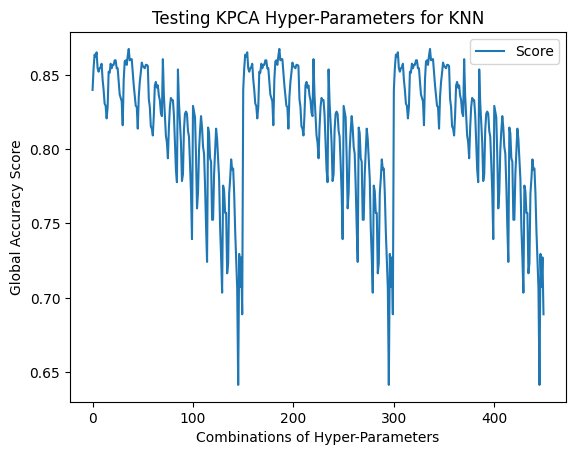

In [35]:
# plot scores from gridsearch for optimal hyperparameters for KPCA and KNN
kpcaallgridscores = list(kpcagrid_search.cv_results_['mean_test_score'])
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(kpcagrid_search.best_score_ *100) )
print(kpcagrid_search.best_params_)

plt.plot(list(range(len(kpcaallgridscores))), kpcaallgridscores, label='Score')
# plt.scatter(k_range[2], allgridscores[2], label='Best Score', color='red')
plt.xlabel('Combinations of Hyper-Parameters')
plt.ylabel('Global Accuracy Score')
plt.title('Testing KPCA Hyper-Parameters for KNN')
plt.legend()

In [41]:
kpcaknntable2 = pd.DataFrame(kpcagrid_search2.cv_results_)
kpcaknntable2 = kpcaknntable2.sort_values(by=['rank_test_score']).head(5)

#save as csv so don't have to run again (took more than 1 hour)
kpcaknntable2.to_csv("kpcaknntable2.csv")

# to add to pdf
print(kpcaknntable2.to_latex(index=False,
                  float_format="{:.5f}".format,))

\begin{tabular}{rrrrllllllrrrrrr}
\toprule
 mean\_fit\_time &  std\_fit\_time &  mean\_score\_time &  std\_score\_time & param\_kpca\_\_coef0 & param\_kpca\_\_degree & param\_kpca\_\_gamma & param\_kpca\_\_kernel & param\_kpca\_\_n\_components &                                             params &  split0\_test\_score &  split1\_test\_score &  split2\_test\_score &  mean\_test\_score &  std\_test\_score &  rank\_test\_score \\
\midrule
       0.11481 &       0.03030 &          0.04523 &         0.00561 &           0.03367 &                  3 &           0.00644 &            sigmoid &                       40 & \{'kpca\_\_coef0': 0.033666666666666664, 'kpca\_\_de... &            0.86667 &            0.90115 &            0.85287 &          0.87356 &         0.02030 &                1 \\
       0.06771 &       0.01031 &          0.03819 &         0.00686 &           0.02822 &                  4 &           0.00644 &            sigmoid &                       40 & \{'kpca\_\_coef0': 0.028

/var/folders/j2/8gptfrvd0_dfl_yxfcck_hh40000gn/T/ipykernel_53389/2047647430.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(kpcaknntable2.to_latex(index=False,


In [42]:
# create table 
kpcaknntable = pd.DataFrame(kpcagrid_search.cv_results_)
kpcaknntable = kpcaknntable.sort_values(by=['rank_test_score']).head(5)

kpcaknntable.to_csv("kpcaknntable.csv")
# to add to pdf
print(kpcaknntable.to_latex(index=False,
                  float_format="{:.5f}".format,))

\begin{tabular}{rrrrlllllrrrrrr}
\toprule
 mean\_fit\_time &  std\_fit\_time &  mean\_score\_time &  std\_score\_time & param\_kpca\_\_alpha & param\_kpca\_\_gamma & param\_kpca\_\_kernel & param\_kpca\_\_n\_components &                                             params &  split0\_test\_score &  split1\_test\_score &  split2\_test\_score &  mean\_test\_score &  std\_test\_score &  rank\_test\_score \\
\midrule
       0.12473 &       0.00770 &          0.06489 &         0.01301 &           0.50000 &           0.01189 &                rbf &                       70 & \{'kpca\_\_alpha': 0.5, 'kpca\_\_gamma': 0.011888888... &            0.86897 &            0.88736 &            0.84598 &          0.86743 &         0.01693 &                1 \\
       0.15389 &       0.02212 &          0.05749 &         0.00148 &           0.05000 &           0.01189 &                rbf &                       70 & \{'kpca\_\_alpha': 0.05, 'kpca\_\_gamma': 0.01188888... &            0.86897 &            0

/var/folders/j2/8gptfrvd0_dfl_yxfcck_hh40000gn/T/ipykernel_53389/2493849087.py:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(kpcaknntable.to_latex(index=False,


In [68]:
# # svc grid search
# clfsvc = Pipeline([
#  ("kpca", KernelPCA()),
#  ("svc", svm.SVC(C=0.1, gamma=1, kernel='poly',probability=True))
#  ])
# param_grid = [{
#  "kpca__n_components": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600],
#  "kpca__gamma": np.linspace(0.001, 0.05, 10),
#  "kpca__coef0": np.linspace(0.001, 0.05, 10),
#  "kpca__degree": [2,3,4,5],
#  "kpca__kernel": ["rbf", "poly", "sigmoid"]
#  }]
# kpcagrid_searchsvc = GridSearchCV(clfsvc, param_grid, cv=3)
# kpcagrid_searchsvc.fit(images, labels)

# grid search for optimal kpca hyper parameters with svc EXTREMELY COMPUTATIONALLY EXPENSIVE 
# TRYING TO TEST SAME PARAMETERS AS TESTED FOR KPCA-->KNN RAN FOR 13+ HOURS WITH NO CONCLUSION
# forced to kill kernel and try another method

In [42]:
# svc grid search part 1
clfsvc = Pipeline([
 ("kpca", KernelPCA()),
 ("svc", svm.SVC(C=0.1, gamma=1, kernel='poly',probability=True))
 ])
param_grid = [{
 "kpca__n_components": [50, 100, 500],
 "kpca__gamma": [0.005, 0.01, 0.1, 0.5, 1, 5],
 "kpca__degree": [2,3,4],
 "kpca__kernel": ["poly","sigmoid"]
 }]
kpcagrid_searchsvc = GridSearchCV(clfsvc, param_grid, cv=3)
kpcagrid_searchsvc.fit(images, labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA()),
                                       ('svc',
                                        SVC(C=0.1, gamma=1, kernel='poly',
                                            probability=True))]),
             param_grid=[{'kpca__degree': [2, 3, 4],
                          'kpca__gamma': [0.005, 0.01, 0.1, 0.5, 1, 5],
                          'kpca__kernel': ['poly', 'sigmoid'],
                          'kpca__n_components': [50, 100, 500]}])

In [47]:
# create table 
kpcasvctable = pd.DataFrame(kpcagrid_searchsvc.cv_results_)

kpcasvctable.to_csv("kpcasvctable.csv")

kpcasvctable = kpcasvctable.sort_values(by=['rank_test_score']).head(5)
# to add to pdf
print(kpcasvctable.to_latex(index=False,
                  float_format="{:.5f}".format,))

\begin{tabular}{rrrrlllllrrrrrr}
\toprule
 mean\_fit\_time &  std\_fit\_time &  mean\_score\_time &  std\_score\_time & param\_kpca\_\_degree & param\_kpca\_\_gamma & param\_kpca\_\_kernel & param\_kpca\_\_n\_components &                                             params &  split0\_test\_score &  split1\_test\_score &  split2\_test\_score &  mean\_test\_score &  std\_test\_score &  rank\_test\_score \\
\midrule
       0.21810 &       0.03482 &          0.02287 &         0.00103 &                  4 &           0.01000 &               poly &                      100 & \{'kpca\_\_degree': 4, 'kpca\_\_gamma': 0.01, 'kpca\_... &            0.89195 &            0.85747 &            0.89425 &          0.88123 &         0.01682 &                1 \\
       0.19961 &       0.00397 &          0.02476 &         0.00251 &                  3 &           0.01000 &               poly &                      100 & \{'kpca\_\_degree': 3, 'kpca\_\_gamma': 0.01, 'kpca\_... &            0.88736 &        

/var/folders/j2/8gptfrvd0_dfl_yxfcck_hh40000gn/T/ipykernel_34565/2322199882.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(kpcasvctable.to_latex(index=False,


In [43]:
print(kpcagrid_searchsvc.best_params_)
print(kpcagrid_searchsvc.best_score_)

{'kpca__degree': 4, 'kpca__gamma': 0.01, 'kpca__kernel': 'poly', 'kpca__n_components': 100}
0.8812260536398467


In [46]:
# svc grid search part 2
clfsvc = Pipeline([
 ("kpca", KernelPCA()),
 ("svc", svm.SVC(C=0.1, gamma=1, kernel='poly',probability=True))
 ])
param_grid2 = [{
 "kpca__n_components": [50, 100, 500],
 "kpca__gamma": [0.005, 0.01, 0.1, 0.5, 1, 5],
 "kpca__kernel": ["rbf"]
 }]
kpcagrid_searchsvc2 = GridSearchCV(clfsvc, param_grid2, cv=3)
kpcagrid_searchsvc2.fit(images, labels)

print(kpcagrid_searchsvc2.best_params_)
print(kpcagrid_searchsvc2.best_score_)

{'kpca__gamma': 0.01, 'kpca__kernel': 'rbf', 'kpca__n_components': 50}
0.5325670498084292


In [48]:
# create table 
kpcasvctable2 = pd.DataFrame(kpcagrid_searchsvc2.cv_results_)

kpcasvctable2.to_csv("kpcasvctable2.csv")

kpcasvctable2 = kpcasvctable2.sort_values(by=['rank_test_score']).head(5)
# to add to pdf
print(kpcasvctable2.to_latex(index=False,
                  float_format="{:.5f}".format,))

\begin{tabular}{rrrrllllrrrrrr}
\toprule
 mean\_fit\_time &  std\_fit\_time &  mean\_score\_time &  std\_score\_time & param\_kpca\_\_gamma & param\_kpca\_\_kernel & param\_kpca\_\_n\_components &                                             params &  split0\_test\_score &  split1\_test\_score &  split2\_test\_score &  mean\_test\_score &  std\_test\_score &  rank\_test\_score \\
\midrule
       0.29945 &       0.02681 &          0.04163 &         0.00165 &           0.01000 &                rbf &                       50 & \{'kpca\_\_gamma': 0.01, 'kpca\_\_kernel': 'rbf', 'k... &            0.54483 &            0.58391 &            0.46897 &          0.53257 &         0.04772 &                1 \\
       0.34519 &       0.00860 &          0.05514 &         0.01588 &           0.01000 &                rbf &                      100 & \{'kpca\_\_gamma': 0.01, 'kpca\_\_kernel': 'rbf', 'k... &            0.54713 &            0.56322 &            0.46207 &          0.52414 &         0.04438

/var/folders/j2/8gptfrvd0_dfl_yxfcck_hh40000gn/T/ipykernel_34565/4266352687.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(kpcasvctable2.to_latex(index=False,


In [48]:
# optimal kpca params for SVC
kpca = KernelPCA(n_components=100, gamma=0.01, coef0=1, degree=4, kernel='poly', fit_inverse_transform=True)
svc = svm.SVC(C=0.1, gamma=1, kernel='poly',probability=True)

xtrain, xtest, ytrain, ytest = train_test_split(images, labels, test_size=0.15, random_state=47, shuffle=True, stratify=labels)


kpcasvc_xtrain = kpca.fit_transform(xtrain)
kpcasvc_xtest = kpca.transform(xtest)

# call predict() function 

predsvckpca, kpca_svcscore, kpca_svc_confusion, kpca_svc_report = predict(svc, kpcasvc_xtrain, ytrain, kpcasvc_xtest, ytest)
kpca_svc_confdf = create_confmat_df(kpca_svc_confusion)
# save confusion matrix to avoid recomputing
kpca_svc_confdf.to_csv("kpca_svc_confdf.csv")

print("Overall Accuracy: {0:.2f}".format(kpca_svcscore))

Overall Accuracy: 0.93


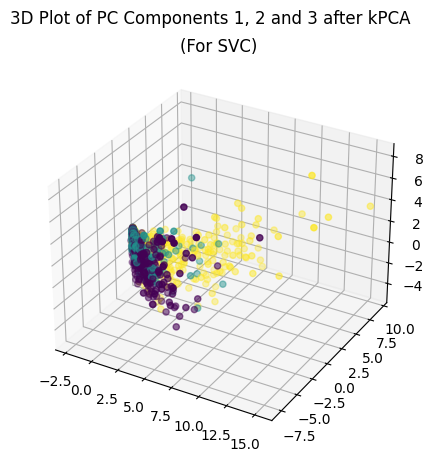

In [55]:
# plot 3d of components
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(kpcasvc_xtrain[:,0], kpcasvc_xtrain[:,1],kpcasvc_xtrain[:,2], c=ytrain)
plt.suptitle("3D Plot of PC Components 1, 2 and 3 after kPCA")
plt.title("(For SVC)")
plt.show()

In [49]:
# repeat optimal KPCA for KNN
kpcaknn = KernelPCA(n_components=40, kernel='sigmoid', degree=2, gamma= 0.0064444444444444445, fit_inverse_transform=True, alpha = 5e-3)
knn = KNeighborsClassifier(n_neighbors=3,algorithm='auto',p=2)

kpcaknn_xtrain = kpcaknn.fit_transform(xtrain)
kpcaknn_xtest = kpcaknn.transform(xtest)

# call predict() function 

predknnkpca, kpca_knnscore, kpca_knn_confusion, kpca_knn_report = predict(knn, kpcaknn_xtrain, ytrain, kpcaknn_xtest, ytest)
kpca_knn_confdf = create_confmat_df(kpca_knn_confusion)
# save confusion matrix to avoid recomputing
kpca_knn_confdf.to_csv("kpca_knn_confdf.csv")

print("Overall Accuracy: {0:.2f}".format(kpca_knnscore))

Overall Accuracy: 0.90


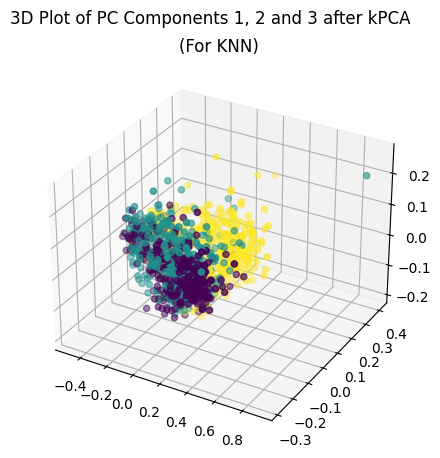

In [56]:
# plot 3d of components
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(kpcaknn_xtrain[:,0], kpcaknn_xtrain[:,1],kpcaknn_xtrain[:,2], c=ytrain)
plt.suptitle("3D Plot of PC Components 1, 2 and 3 after kPCA")
plt.title("(For KNN)")
plt.show()

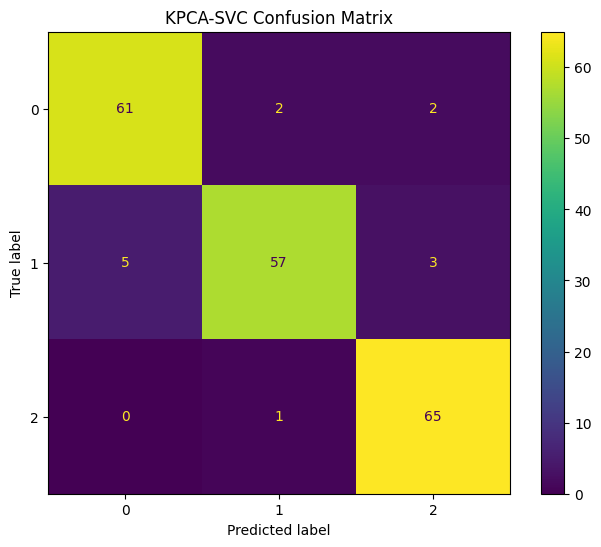

In [50]:
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(kpca_svc_confusion, display_labels=svc.classes_)

# set the plot title using the axes object
ax.set(title='KPCA-SVC Confusion Matrix')

# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax)

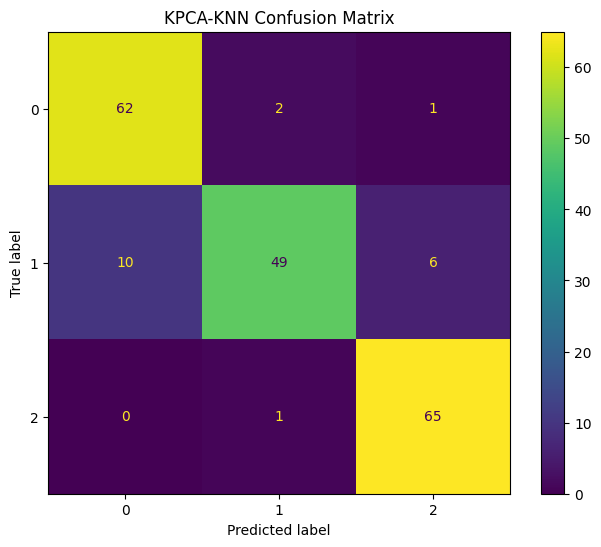

In [51]:
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(kpca_knn_confusion, display_labels=knn.classes_)

# set the plot title using the axes object
ax.set(title='KPCA-KNN Confusion Matrix')

# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax)

In [24]:
kpca_knn_confdf = pd.read_csv("kpca_knn_confdf.csv")
kpca_svc_confdf = pd.read_csv("kpca_svc_confdf.csv")

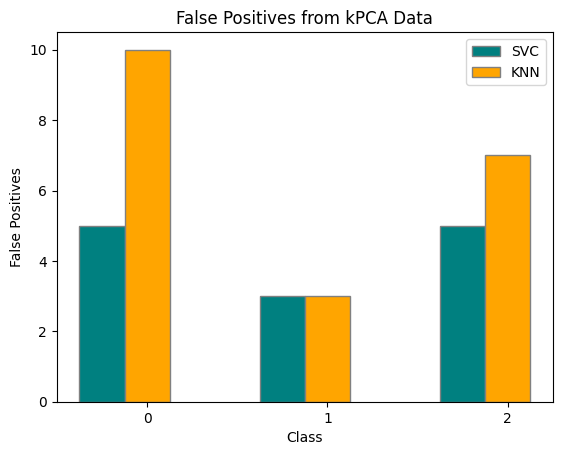

In [25]:
barWidth = 0.25
br1 = np.arange(len(kpca_svc_confdf))
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, kpca_svc_confdf.FP, color ='teal', width = barWidth,
        edgecolor ='grey', label ='SVC')
plt.bar(br2, kpca_knn_confdf.FP, color ='orange', width = barWidth,
        edgecolor ='grey', label ='KNN')
 
# Adding Xticks
plt.xlabel('Class')
plt.ylabel('False Positives')
plt.title('False Positives from kPCA Data')
plt.xticks([r + barWidth for r in range(len(svc_df))],
        ['0', '1', '2'])
 
plt.legend()
plt.show()

In [39]:
# inverse transform --> reconstruct images for both instances of kpca

# kpcaknn
invkpca_xtrainknn = kpcaknn.inverse_transform(kpcaknn_xtrain)
invkpca_xtestknn = kpcaknn.inverse_transform(kpcaknn_xtest)

# kpcasvc
invkpca_xtrainsvc = kpca.inverse_transform(kpcasvc_xtrain)
invkpca_xtestsvc = kpca.inverse_transform(kpcasvc_xtest)

Text(0.5, 1.0, '(Train Label: babydoll/trapeze)')
Text(0.5, 1.0, '(Train Label: bustier/hourglass)')
Text(0.5, 1.0, '(Train Label: tshirt/straight)')
Text(0.5, 1.0, '(Test Label: babydoll/trapeze)')
Text(0.5, 1.0, '(Test Label: bustier/hourglass)')
Text(0.5, 1.0, '(Test Label: tshirt/straight)')


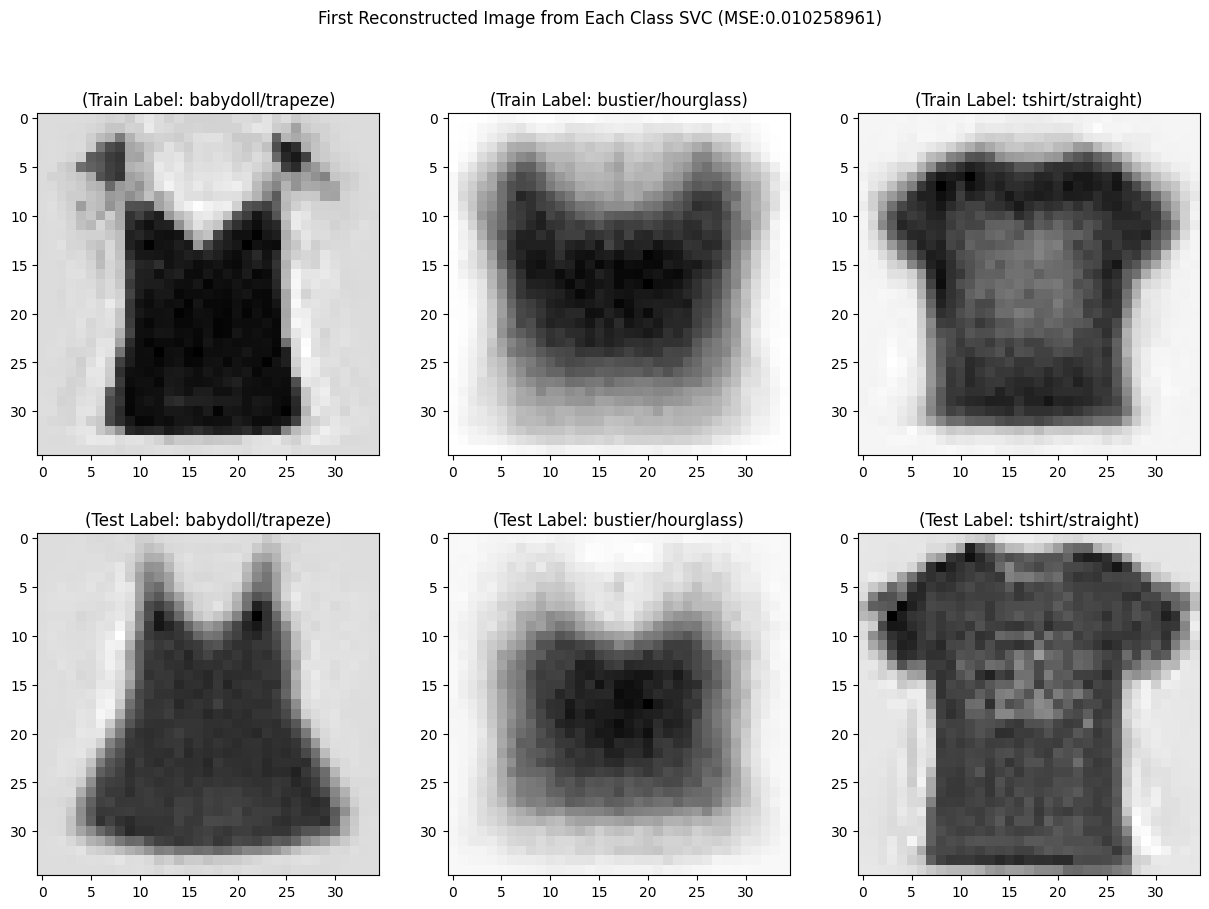

In [42]:
# plot reconstructed images of first reconstructed img of each class from SVC instance
find = [8, 1, 0, 2, 3, 0]
%matplotlib inline
plt.figure(figsize = [15,10])
for i in range(6):
    if i < 3:
        plt.subplot(2,3,i+1)
        im = np.reshape(invkpca_xtrainsvc[find[i]],(35,35))
        plt.imshow(im, cmap='gray_r')
        plt.suptitle("First Reconstructed Image from Each Class SVC" + " (MSE:" + str(np.mean((xtrain - invkpca_xtrainsvc) ** 2)) + ")")
        print(plt.title("(Train Label: " + str(label_list[ytrain[find[i]]]) + ")"))
    else:
        plt.subplot(2,3,i+1)
        im = np.reshape(invkpca_xtestsvc[find[i]],(35,35))
        plt.imshow(im, cmap='gray_r')
        print(plt.title("(Test Label: " + str(label_list[ytest[find[i]]]) + ")"))

Text(0.5, 1.0, '(Train Label: babydoll/trapeze)')
Text(0.5, 1.0, '(Train Label: bustier/hourglass)')
Text(0.5, 1.0, '(Train Label: tshirt/straight)')
Text(0.5, 1.0, '(Test Label: babydoll/trapeze)')
Text(0.5, 1.0, '(Test Label: bustier/hourglass)')
Text(0.5, 1.0, '(Test Label: tshirt/straight)')


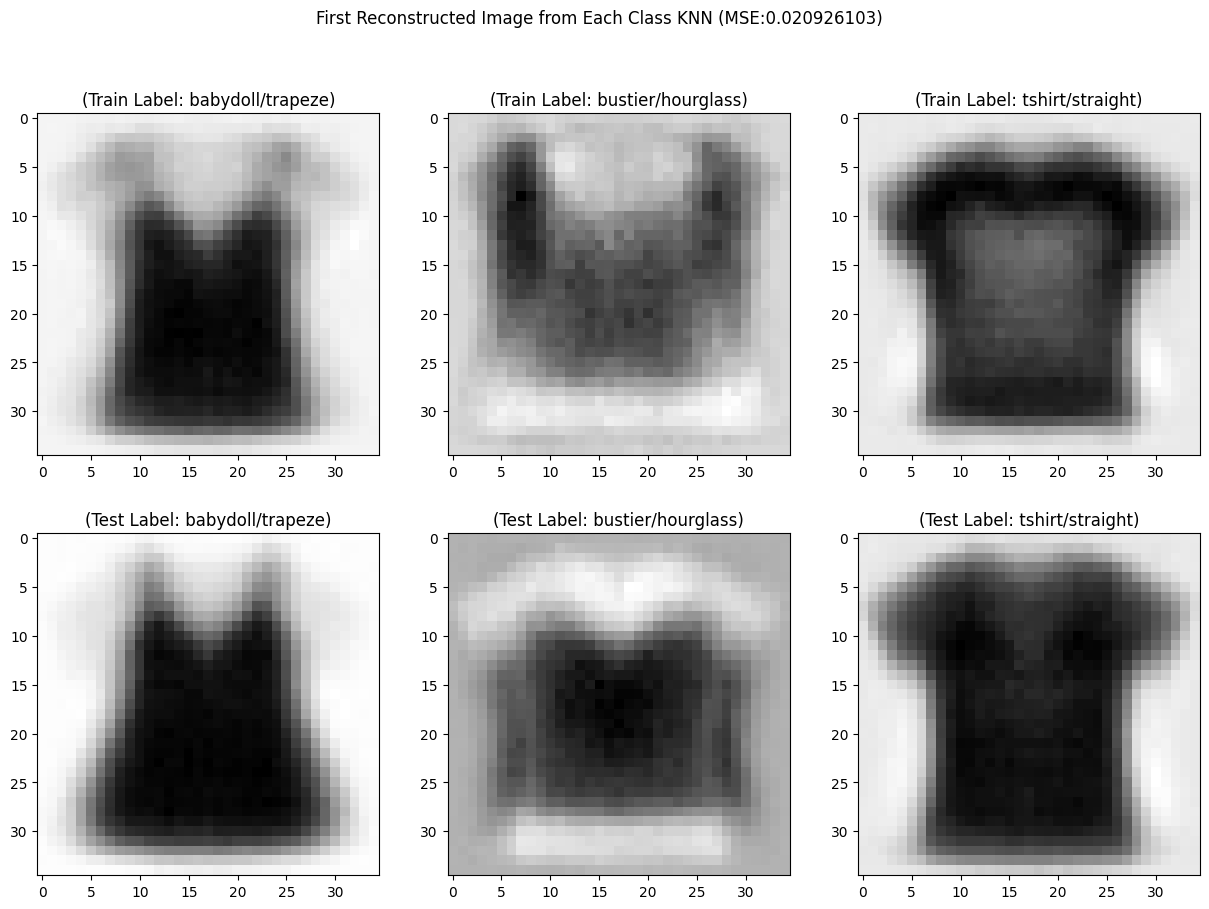

In [41]:
# plot reconstructed images of first reconstructed img of each class from KNN instance
%matplotlib inline
plt.figure(figsize = [15,10])
for i in range(6):
    if i < 3:
        plt.subplot(2,3,i+1)
        im = np.reshape(invkpca_xtrainknn[find[i]],(35,35))
        plt.imshow(im, cmap='gray_r')
        plt.suptitle("First Reconstructed Image from Each Class KNN" + " (MSE:" + str(np.mean((xtrain - invkpca_xtrainknn) ** 2)) + ")")
        print(plt.title("(Train Label: " + str(label_list[ytrain[find[i]]]) + ")"))
    else:
        plt.subplot(2,3,i+1)
        im = np.reshape(invkpca_xtestknn[find[i]],(35,35))
        plt.imshow(im, cmap='gray_r')
        print(plt.title("(Test Label: " + str(label_list[ytest[find[i]]]) + ")"))

## Isomap Code :)

Isomap can be used in the medical field to make ultrasound & echocardiography images better interpretable with noise removal. The manifold learning algorithm is applied to two-dimensional echocardiography images to discover the relationship between the frames of consecutive cycles of the heart motion

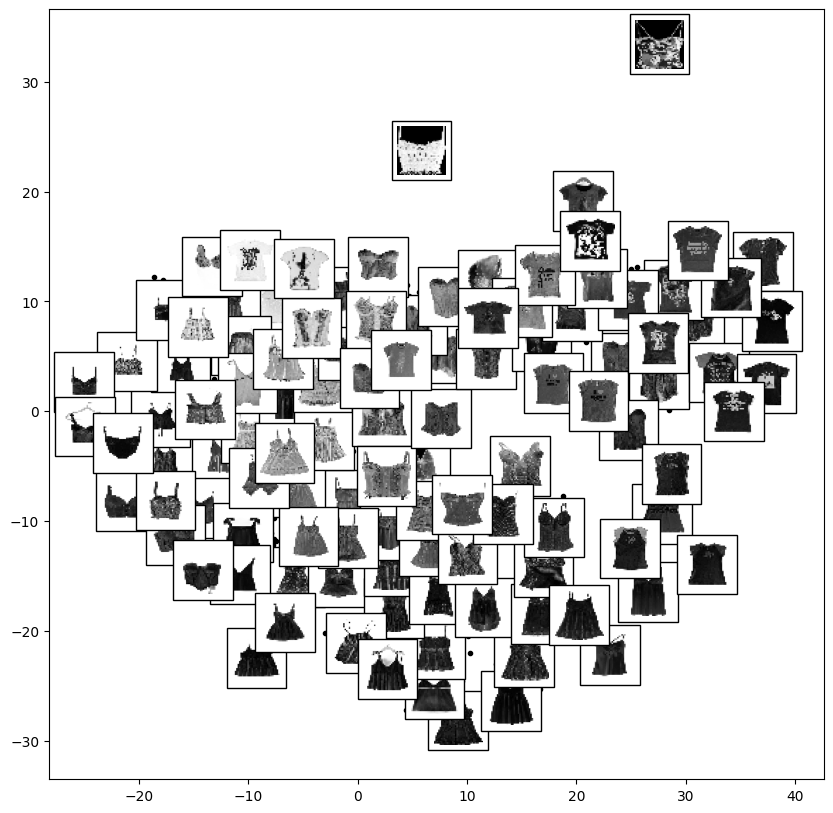

In [17]:
from sklearn.manifold import Isomap
from matplotlib.offsetbox import AnnotationBbox
from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

from sklearn.manifold import Isomap
model = Isomap(n_components=2)


fig, ax = plt.subplots(figsize=(10, 10))
plot_components(images, model, images=images.reshape((-1, 35, 35)),
                ax=ax, thumb_frac=0.05, cmap='gray_r')

In [13]:
# initiate optimal knn model to test the optimal pca dimensions
knn = KNeighborsClassifier(n_neighbors=3,algorithm='auto',p=2)
# initiate optimal svm model to test optimal pca
svc=svm.SVC(C=0.1, gamma=1, kernel='poly',probability=True)

# percentage of explained variance to test
radius = np.array([3, 7, 11, 15, 20, 30, 40, 50, 75, 100])
knntest_Scores = []
svctest_Scores = []

for i in radius:
    isomap = Isomap(n_components = 30, n_neighbors= i, n_jobs=-1, metric='euclidean', p=2)
    postmap = isomap.fit_transform(images)
    xtrain, xtest, ytrain, ytest = train_test_split(postmap, labels, test_size=0.15, random_state=47, shuffle=True, stratify=labels)
    knn.fit(xtrain, ytrain)
    svc.fit(xtrain, ytrain)
    ypredknn = knn.predict(xtest)
    knnout = accuracy_score(ytest, ypredknn)
    knntest_Scores.append(knnout)
    ypredsvc = svc.predict(xtest)
    svcout = accuracy_score(ytest, ypredsvc)
    svctest_Scores.append(svcout)

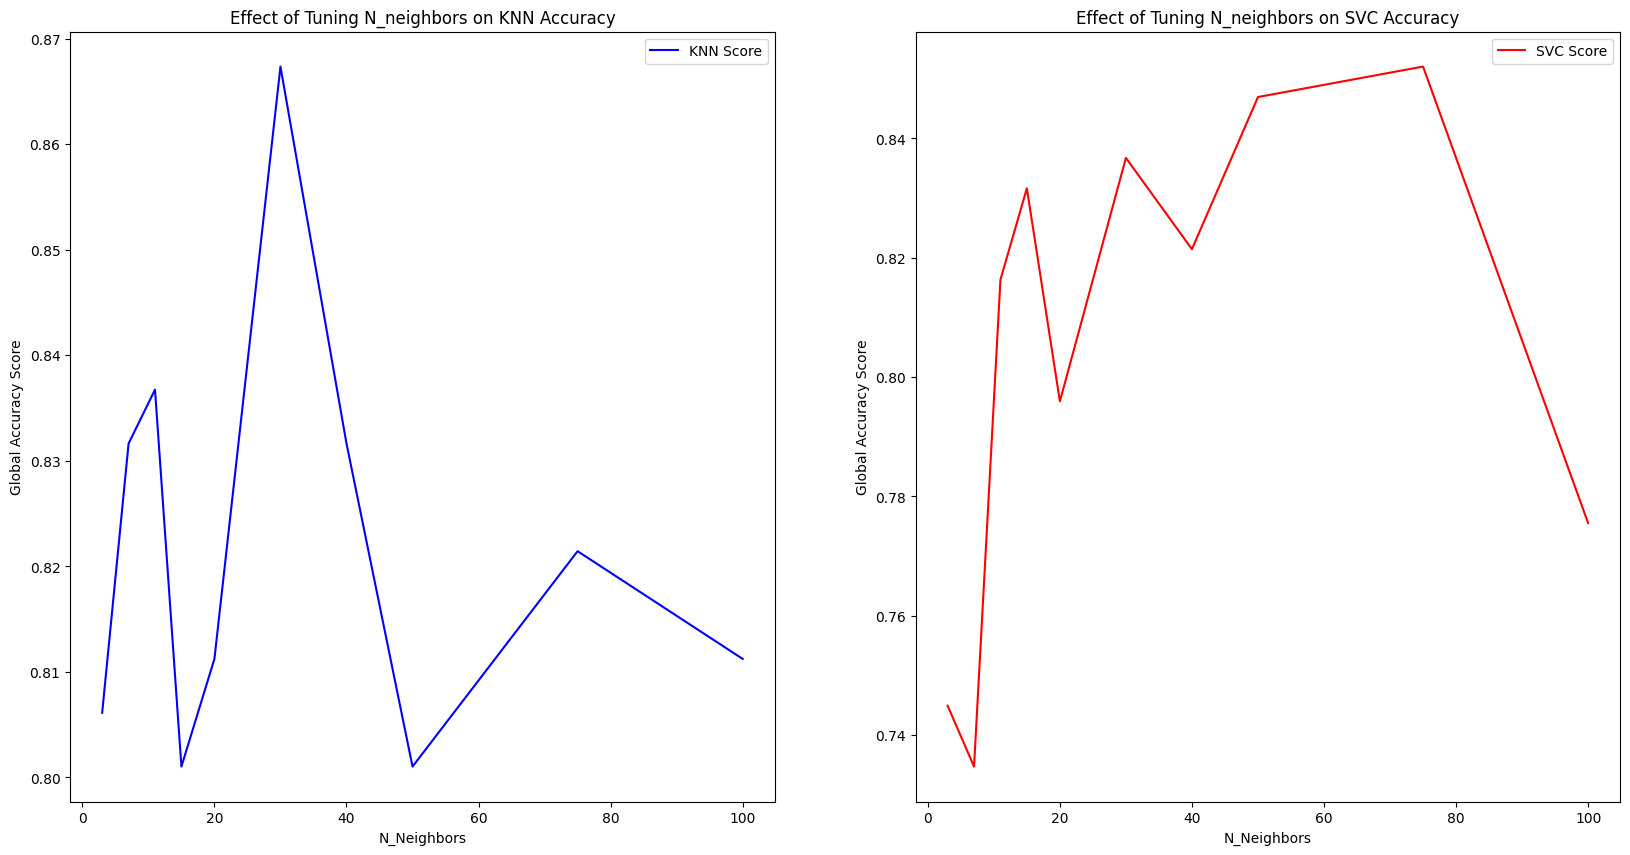

In [15]:
# compare results 

%matplotlib inline

plt.figure(figsize = [20,10])

plt.subplot(1,2,1)
plt.plot(radius, knntest_Scores, color='b', label='KNN Score')
plt.xlabel('N_Neighbors')
plt.ylabel('Global Accuracy Score')
plt.title('Effect of Tuning N_neighbors on KNN Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(radius, svctest_Scores, color='red',label='SVC Score')
plt.xlabel('N_Neighbors')
plt.ylabel('Global Accuracy Score')
plt.title('Effect of Tuning N_neighbors on SVC Accuracy')
plt.legend()
plt.show()

In [18]:
# svc grid search part 2
clfsvc = Pipeline([
 ("isomap", Isomap(n_jobs=-1, metric='euclidean', p=2)),
 ("svc", svm.SVC(C=0.1, gamma=1, kernel='poly',probability=True))
 ])
param_grid2 = [{
 "isomap__n_neighbors": ([3, 7, 11, 15, 20, 30, 40, 50, 75, 100]),
 "isomap__n_components": [10, 30, 50, 100],
 }]
isogrid_searchsvc2 = GridSearchCV(clfsvc, param_grid2, cv=3)
isogrid_searchsvc2.fit(images, labels)

print(isogrid_searchsvc2.best_params_)
print(isogrid_searchsvc2.best_score_)

{'isomap__n_components': 100, 'isomap__n_neighbors': 75}
0.786206896551724


In [19]:
# create table 
isosvctable2 = pd.DataFrame(isogrid_searchsvc2.cv_results_)

isosvctable2.to_csv("isosvctable2.csv")

isosvctable2 = isosvctable2.sort_values(by=['rank_test_score']).head(5)
# to add to pdf
print(isosvctable2.to_latex(index=False,
                  float_format="{:.5f}".format,))

\begin{tabular}{rrrrlllrrrrrr}
\toprule
 mean\_fit\_time &  std\_fit\_time &  mean\_score\_time &  std\_score\_time & param\_isomap\_\_n\_components & param\_isomap\_\_n\_neighbors &                                             params &  split0\_test\_score &  split1\_test\_score &  split2\_test\_score &  mean\_test\_score &  std\_test\_score &  rank\_test\_score \\
\midrule
       1.18619 &       0.00833 &          0.12314 &         0.00177 &                        100 &                        75 & \{'isomap\_\_n\_components': 100, 'isomap\_\_n\_neighb... &            0.81839 &            0.77701 &            0.76322 &          0.78621 &         0.02344 &                1 \\
       1.08267 &       0.00862 &          0.11788 &         0.00326 &                         50 &                        75 & \{'isomap\_\_n\_components': 50, 'isomap\_\_n\_neighbo... &            0.81149 &            0.77241 &            0.77011 &          0.78467 &         0.01899 &                2 \\
       0.

/var/folders/j2/8gptfrvd0_dfl_yxfcck_hh40000gn/T/ipykernel_1160/2570818297.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(isosvctable2.to_latex(index=False,


In [20]:
# grid search part 2
clfknn = Pipeline([
 ("isomap", Isomap(n_jobs=-1, metric='euclidean', p=2)),
 ("knn", KNeighborsClassifier(n_neighbors=3,algorithm='auto',p=2))
 ])
param_grid2 = [{
 "isomap__n_neighbors": ([3, 7, 11, 15, 20, 30, 40, 50, 75, 100]),
 "isomap__n_components": [10, 30, 50, 100],
 }]
isogrid_searchknn = GridSearchCV(clfknn, param_grid2, cv=3)
isogrid_searchknn.fit(images, labels)

print(isogrid_searchknn.best_params_)
print(isogrid_searchknn.best_score_)

{'isomap__n_components': 100, 'isomap__n_neighbors': 3}
0.7938697318007663


In [21]:
# create table 
isoknntable2 = pd.DataFrame(isogrid_searchknn.cv_results_)

isoknntable2.to_csv("isoknntable2.csv")

isoknntable2 = isoknntable2.sort_values(by=['rank_test_score']).head(5)
# to add to pdf
print(isoknntable2.to_latex(index=False,
                  float_format="{:.5f}".format,))

\begin{tabular}{rrrrlllrrrrrr}
\toprule
 mean\_fit\_time &  std\_fit\_time &  mean\_score\_time &  std\_score\_time & param\_isomap\_\_n\_components & param\_isomap\_\_n\_neighbors &                                             params &  split0\_test\_score &  split1\_test\_score &  split2\_test\_score &  mean\_test\_score &  std\_test\_score &  rank\_test\_score \\
\midrule
       0.37033 &       0.00459 &          0.06997 &         0.00276 &                        100 &                         3 & \{'isomap\_\_n\_components': 100, 'isomap\_\_n\_neighb... &            0.80690 &            0.80230 &            0.77241 &          0.79387 &         0.01529 &                1 \\
       0.37098 &       0.02694 &          0.07059 &         0.00401 &                         50 &                         3 & \{'isomap\_\_n\_components': 50, 'isomap\_\_n\_neighbo... &            0.79770 &            0.79540 &            0.77011 &          0.78774 &         0.01250 &                2 \\
       0.

/var/folders/j2/8gptfrvd0_dfl_yxfcck_hh40000gn/T/ipykernel_1160/3734134559.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(isoknntable2.to_latex(index=False,


In [25]:
# repeat optimal Isomap for KNN
isoknn = Isomap(n_components=100, n_neighbors=3, n_jobs=-1, metric='euclidean', p=2)
knn = KNeighborsClassifier(n_neighbors=3,algorithm='auto',p=2)

# recreate optimal split
xtrain, xtest, ytrain, ytest = train_test_split(images, labels, test_size=0.15, random_state=47, shuffle=True, stratify=labels)

# transform into isomap embeddings
isoknn_xtrain = isoknn.fit_transform(xtrain)
isoknn_xtest = isoknn.transform(xtest)

# call predict() function 

predknniso, iso_knnscore, iso_knn_confusion, iso_knn_report = predict(knn, isoknn_xtrain, ytrain, isoknn_xtest, ytest)
iso_knn_confdf = create_confmat_df(iso_knn_confusion)
# save confusion matrix to avoid recomputing
iso_knn_confdf.to_csv("iso_knn_confdf.csv")

print("Overall Accuracy: {0:.2f}".format(iso_knnscore))

Overall Accuracy: 0.80


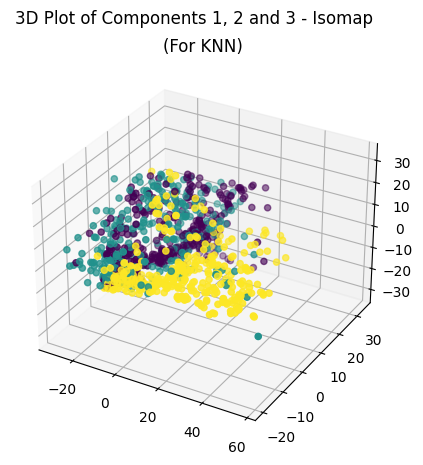

In [57]:
# plot 3d of components
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(isoknn_xtrain[:,0], isoknn_xtrain[:,1],isoknn_xtrain[:,2], c=ytrain)
plt.suptitle("3D Plot of Components 1, 2 and 3 - Isomap")
plt.title("(For KNN)")
plt.show()

In [27]:
# repeat optimal Isomap for svc
isosvc = Isomap(n_components=100, n_neighbors=75, n_jobs=-1, metric='euclidean', p=2)
svc = svm.SVC(C=0.1, gamma=1, kernel='poly',probability=True)

# recreate optimal split
xtrain, xtest, ytrain, ytest = train_test_split(images, labels, test_size=0.15, random_state=47, shuffle=True, stratify=labels)

# transform into isomap embeddings
isosvc_xtrain = isosvc.fit_transform(xtrain)
isosvc_xtest = isosvc.transform(xtest)

# call predict() function 

predsvciso, iso_svcscore, iso_svc_confusion, iso_svc_report = predict(svc, isosvc_xtrain, ytrain, isosvc_xtest, ytest)
iso_svc_confdf = create_confmat_df(iso_svc_confusion)
# save confusion matrix to avoid recomputing
iso_svc_confdf.to_csv("iso_svc_confdf.csv")

print("Overall Accuracy: {0:.2f}".format(iso_svcscore))

Overall Accuracy: 0.81


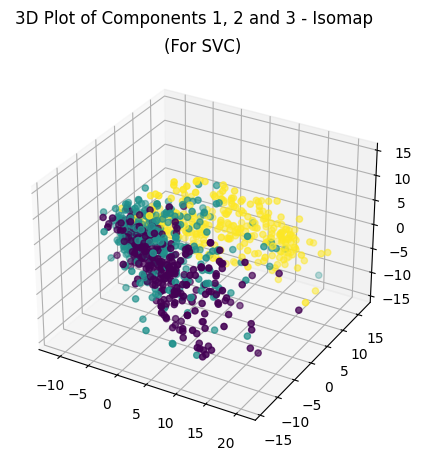

In [58]:
# plot 3d of components
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(isosvc_xtrain[:,0], isosvc_xtrain[:,1],isosvc_xtrain[:,2], c=ytrain)
plt.suptitle("3D Plot of Components 1, 2 and 3 - Isomap")
plt.title("(For SVC)")
plt.show()

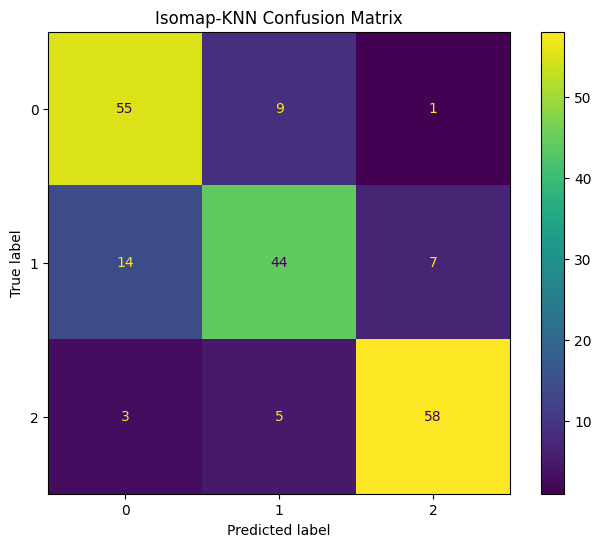

In [28]:
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(iso_knn_confusion, display_labels=knn.classes_)

# set the plot title using the axes object
ax.set(title='Isomap-KNN Confusion Matrix')

# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax)

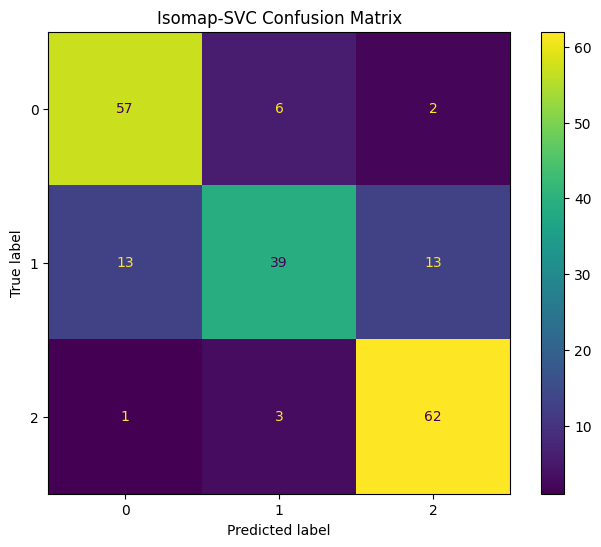

In [29]:
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(iso_svc_confusion, display_labels=svc.classes_)

# set the plot title using the axes object
ax.set(title='Isomap-SVC Confusion Matrix')

# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax)

### Comparison Code

In [31]:
knn_df = pd.read_csv("knn_df.csv")
knn_pca_df = pd.read_csv("knn_pca_df.csv")
kpca_knn_confdf = pd.read_csv("kpca_knn_confdf.csv")

svc_df = pd.read_csv("svc_df.csv")
svc_pca_df = pd.read_csv("svc_pca_df.csv")
kpca_svc_confdf = pd.read_csv("kpca_svc_confdf.csv")

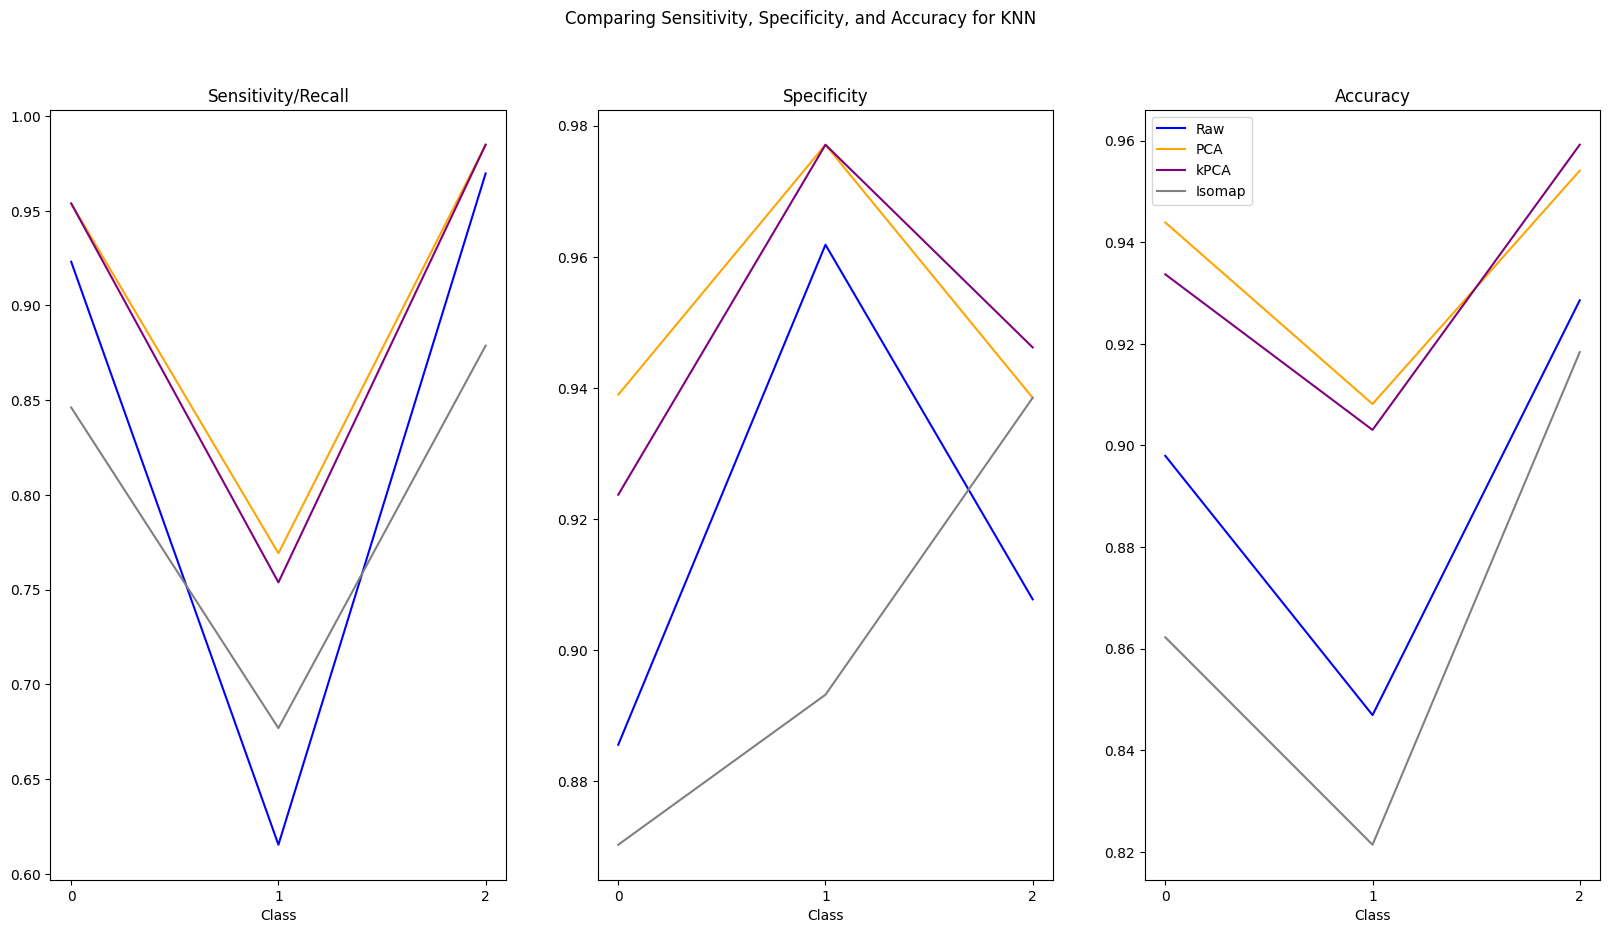

In [35]:
%matplotlib inline

plt.figure(figsize = [20,10])

plt.subplot(1,3,1)
plt.plot(knn_df.index, knn_df['SENSITIVITY'], color='b', label='Raw')
plt.plot(knn_df.index, knn_pca_df['SENSITIVITY'], color='orange', label = 'PCA')
plt.plot(knn_df.index, kpca_knn_confdf['SENSITIVITY'], color='purple', label = 'kPCA')
plt.plot(knn_df.index, iso_knn_confdf['SENSITIVITY'], color='gray', label = 'Isomap')
plt.xticks(np.array([0,1,2]))
plt.xlabel('Class')
plt.title('Sensitivity/Recall')


plt.subplot(1,3,2)
plt.plot(knn_df.index, knn_df['SPECIFICITY'], color='b', label='Raw')
plt.plot(knn_df.index, knn_pca_df['SPECIFICITY'], color='orange', label = 'PCA')
plt.plot(knn_df.index, kpca_knn_confdf['SPECIFICITY'], color='purple', label = 'kPCA')
plt.plot(knn_df.index, iso_knn_confdf['SPECIFICITY'], color='gray', label = 'Isomap')
plt.xticks(np.array([0,1,2]))
plt.xlabel('Class')
plt.title('Specificity')

plt.subplot(1,3,3)
plt.plot(knn_df.index, knn_df['ACCURACY'], color='b', label='Raw')
plt.plot(knn_df.index, knn_pca_df['ACCURACY'], color='orange', label = 'PCA')
plt.plot(knn_df.index, kpca_knn_confdf['ACCURACY'], color='purple', label = 'kPCA')
plt.plot(knn_df.index, iso_knn_confdf['ACCURACY'], color='gray', label = 'Isomap')
plt.xticks(np.array([0,1,2]))
plt.xlabel('Class')
plt.title('Accuracy')


plt.suptitle("Comparing Sensitivity, Specificity, and Accuracy for KNN")
plt.legend()
plt.show()

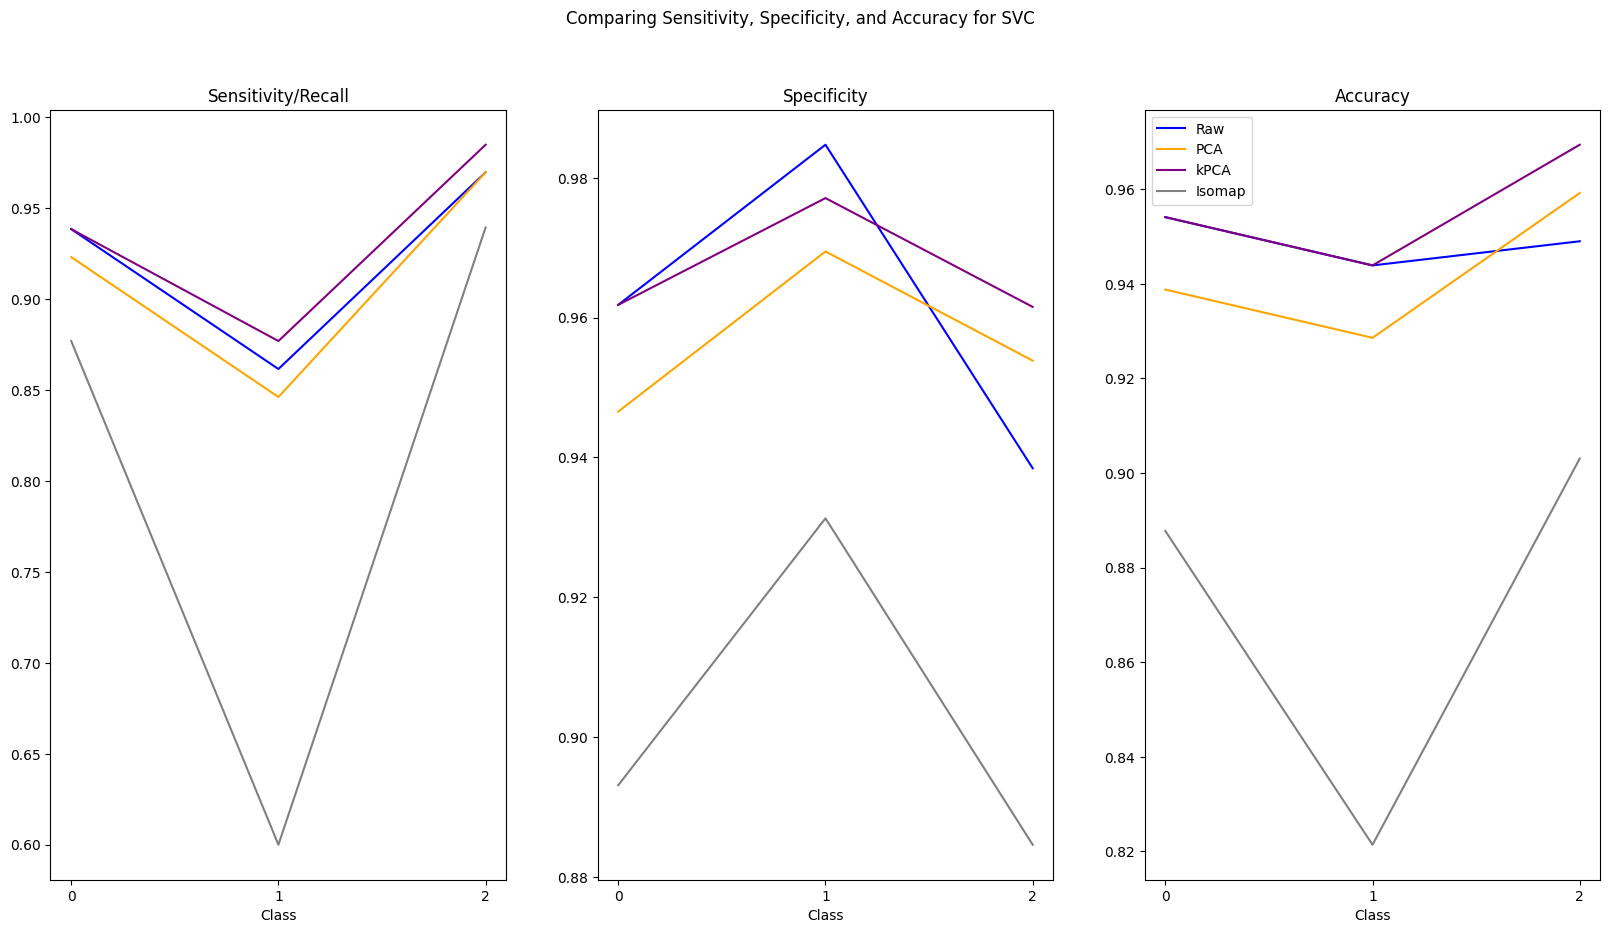

In [37]:
%matplotlib inline

plt.figure(figsize = [20,10])

plt.subplot(1,3,1)
plt.plot(svc_df.index, svc_df['SENSITIVITY'], color='b', label='Raw')
plt.plot(svc_df.index, svc_pca_df['SENSITIVITY'], color='orange', label = 'PCA')
plt.plot(svc_df.index, kpca_svc_confdf['SENSITIVITY'], color='purple', label = 'kPCA')
plt.plot(svc_df.index, iso_svc_confdf['SENSITIVITY'], color='gray', label = 'Isomap')
plt.xticks(np.array([0,1,2]))
plt.xlabel('Class')
plt.title('Sensitivity/Recall')


plt.subplot(1,3,2)
plt.plot(svc_df.index, svc_df['SPECIFICITY'], color='b', label='Raw')
plt.plot(svc_df.index, svc_pca_df['SPECIFICITY'], color='orange', label = 'PCA')
plt.plot(svc_df.index, kpca_svc_confdf['SPECIFICITY'], color='purple', label = 'kPCA')
plt.plot(svc_df.index, iso_svc_confdf['SPECIFICITY'], color='gray', label = 'Isomap')
plt.xticks(np.array([0,1,2]))
plt.xlabel('Class')
plt.title('Specificity')

plt.subplot(1,3,3)
plt.plot(svc_df.index, svc_df['ACCURACY'], color='b', label='Raw')
plt.plot(svc_df.index, svc_pca_df['ACCURACY'], color='orange', label = 'PCA')
plt.plot(svc_df.index, kpca_svc_confdf['ACCURACY'], color='purple', label = 'kPCA')
plt.plot(svc_df.index, iso_svc_confdf['ACCURACY'], color='gray', label = 'Isomap')
plt.xticks(np.array([0,1,2]))
plt.xlabel('Class')
plt.title('Accuracy')


plt.suptitle("Comparing Sensitivity, Specificity, and Accuracy for SVC")
plt.legend()
plt.show()